In [1]:
import pandas as pd


df = pd.read_excel('../../data/raw/HISTORICO_SUERTES.xlsx')
# Visualizar las primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())

Primeras 5 filas del dataset:
   Período  Hacienda             Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493          LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284    UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203      EL AMPARO SAA  IP05      31.0    007  CORINTIAS    
3   201701     81380  SAN JUDAS INCAUCA  IP05      82.0   013A         NaN   
4   201701     80298               JAVA  IP06      31.0   025A     GALPON    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   
3       1.05     66.5  CC01-1940  ...                      NaN   
4       4.53     17.0  RB73-2223  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN  

In [2]:
# Información general del DataFrame
print("\nInformación del DataFrame (.info()):")
df.info()


Información del DataFrame (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21

In [3]:
# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas Descriptivas (.describe()):")
print(df.describe())


Estadísticas Descriptivas (.describe()):
             Período      Hacienda      Tenencia     Area Neta       Dist Km  \
count   21027.000000  21027.000000  21026.000000  21027.000000  21022.000000   
mean   202039.708708  80679.334427     46.448730      8.642948     25.311806   
min    201701.000000  80100.000000     11.000000      0.004000      1.100000   
25%    201812.000000  80247.000000     31.000000      3.310000     12.000000   
50%    202010.000000  80453.000000     51.000000      7.000000     21.900000   
75%    202209.000000  81104.000000     51.000000     12.075000     32.700000   
max    202407.000000  82557.000000     91.000000     65.000000    155.000000   
std       216.642895    590.030150     21.513498      7.049533     18.237344   

       Cod.Estado #                      F.Siembra  \
count  21027.000000                          21027   
mean       4.261806  2015-03-11 18:18:44.839492096   
min        0.000000            1986-04-30 00:00:00   
25%        1.000000  

In [4]:
# Búsqueda de duplicados
print(f"\nNúmero de filas duplicadas: {df.duplicated().sum()}")


Número de filas duplicadas: 0


In [5]:
df.dtypes

Período                    int64
Hacienda                   int64
Nombre                    object
Zona                      object
Tenencia                 float64
                          ...   
Radiacion Solar Ciclo    float64
Precipitacion 0_3        float64
Precipitacion Ciclo      float64
Evaporacion 0-3          float64
Evaporacion Ciclo        float64
Length: 85, dtype: object

In [7]:
valores_nulos = df.isnull().sum()
valores_nulos = valores_nulos[valores_nulos > 0]
print(valores_nulos)

Tenencia                         1
Suelo                         3758
Dist Km                          5
D.S.                         13859
Ult.Riego                    12557
Cod. T.Cultivo                   2
Cultivo                          2
Fec.Madur.                    9775
Producto                      9778
Dosis Madurante                104
Semanas mad.                  9775
Ton.Azucar                     241
Rdto                           267
TAH                            241
TAHM                           241
Sac.Caña Precosecha           1098
Edad.Precosecha              12108
%Sac.Caña                      449
%Sac.Muestreadora             1858
%ATR                           522
KATRHM                         522
%Fibra Caña                   1858
%AR Jugo                      2124
%ME Min                       1722
%ME Veg                       1720
%ME Tot                       1720
Brix                           267
Pureza                         269
Vejez               

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

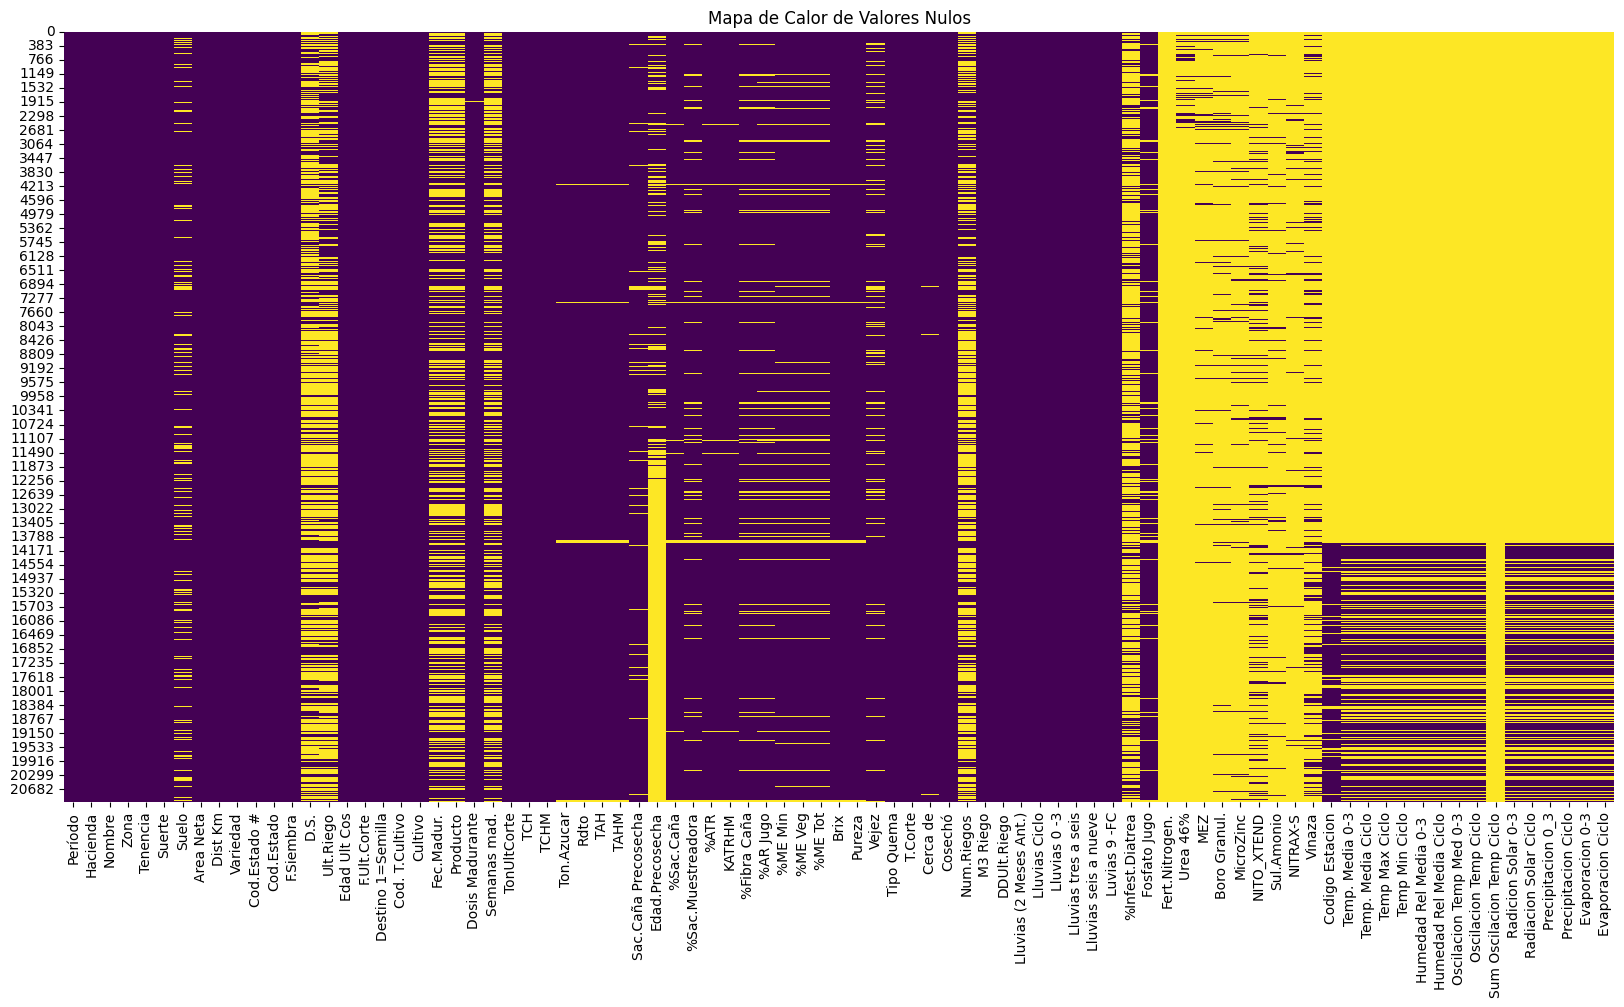

In [9]:
# Visualización de valores nulos
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

In [13]:
# Porcentaje de nulos y cardinalidad por columna
null_percentage = (df.isnull().sum() / len(df)) * 100
cardinality = df.nunique()
eda_summary = pd.DataFrame({
    'Porcentaje de Nulos (%)': null_percentage ,
    'Cardinalidad (Valores Únicos)': cardinality
})
print("\nResumen de Nulos y Cardinalidad:")
print(eda_summary.sort_values(by='Porcentaje de Nulos (%)', ascending=False))


Resumen de Nulos y Cardinalidad:
                           Porcentaje de Nulos (%)  \
Sum Oscilacion Temp Ciclo               100.000000   
Fert.Nitrogen.                          100.000000   
Urea 46%                                 96.561564   
NITRAX-S                                 96.442669   
MEZ                                      95.382128   
...                                            ...   
Lluvias seis a nueve                      0.000000   
Luvias 9 -FC                              0.000000   
Lluvias tres a seis                       0.000000   
Lluvias 0 -3                              0.000000   
Lluvias Ciclo                             0.000000   

                           Cardinalidad (Valores Únicos)  
Sum Oscilacion Temp Ciclo                              0  
Fert.Nitrogen.                                         0  
Urea 46%                                             413  
NITRAX-S                                             430  
MEZ                   

Variables con Alto Porcentaje de Nulos (>50%): Sul.Amonio, Boro Granul., NITRAX-S, MicroZinc, Urea 46%, NITO_XTEND, MEZ, Vinaza son columnas relacionadas con fertilizantes y tienen una cantidad masiva de datos faltantes. Serán descartadas.

Cardinalidad Elevada: Hacienda, Nombre, y Suerte tienen una alta cardinalidad, lo que confirma que son identificadores únicos y no deben usarse como características predictivas. 

F.Siembra, F.Ult.Corte y Ult.Riego también tienen muchos valores únicos, pero representan fechas que pueden ser transformadas en características útiles (ej: antigüedad)

Columnas Problemáticas: Columnas como Area Neta y Dist Km tienen valores no numéricos (' o ,) que deben ser limpiados antes del análisis.

## Análisis de las Variables Objetivo (TCH y %Sac.Caña)


In [15]:
df[['TCH', '%Sac.Caña']].describe()

TCH     %Sac.Caña
count  21027.000000  20578.000000
mean     129.608509     12.320202
std       32.846029      1.145738
min        1.573653      7.086000
25%      108.691426     11.619000
50%      129.479600     12.370650
75%      150.407607     13.087500
max      401.045947     18.400000

In [16]:
df[['TCH', '%Sac.Caña']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TCH        21027 non-null  float64
 1   %Sac.Caña  20578 non-null  float64
dtypes: float64(2)
memory usage: 328.7 KB


In [17]:
# Limpieza y conversión de variables objetivo a numéricas
df['TCH'] = pd.to_numeric(df['TCH'], errors='coerce')
df['%Sac.Caña'] = pd.to_numeric(df['%Sac.Caña'], errors='coerce')

No, nunca debemos imputar la variable objetivo.

Es una práctica correcta y necesaria imputar los datos de las variables predictoras (features), pero es un error fundamental imputar la variable objetivo (target)

In [18]:
# Eliminar filas donde los objetivos son nulos
df.dropna(subset=['TCH', '%Sac.Caña'], inplace=True)

In [19]:
df

Período  Hacienda               Nombre  Zona  Tenencia Suerte  \
0       201701     80493            LA CONCHA  IP02      51.0   002A   
1       201701     81284      UKRANIA INCAUCA  IP05      81.0   039B   
2       201701     80203        EL AMPARO SAA  IP05      31.0    007   
3       201701     81380    SAN JUDAS INCAUCA  IP05      82.0   013A   
4       201701     80298                 JAVA  IP06      31.0   025A   
...        ...       ...                  ...   ...       ...    ...   
20970   202406     80289      EL CARMEN MEJIA  IP01      31.0    001   
20971   202406     82506  EL HIGUERON EMPRESA  IP05      11.0   005A   
20972   202406     82510    EL CARMEN VELASCO  IP01      31.0   001A   
20973   202406     82530               ARAUCA  IP05      31.0    006   
20974   202406     82552    EL ALBION EMPRESA  IP01      11.0    044   

            Suelo  Area Neta  Dist Km   Variedad  ...  \
0       CANTARINA       6.00      4.3    CC85-92  ...   
1             NaN       1.45      NaN    CC85-92  ...   
2      CORINTIAS        8.24     23.0  CC01-1228  ...   
3             NaN       1.05     66.5  CC01-1940  ...   
4         GALPON        4.53     17.0  RB73-2223  ...   
...           ...        ...      ...        ...  ...   
20970       NIMA        7.96      5.0  CC01-1940  ...   
20971        JOYA      42.74     42.0  CC01-1940  ...   
20972       NIMA        1.32      5.0  CC01-1940  ...   
20973  MANUELITA        6.27     34.7   CC05-430  ...   
20974  CORINTIAS       12.57      6.5   CC09-535  ...   

       Humedad Rel Media Ciclo Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo  \
0                          NaN                     NaN                   NaN   
1                          NaN                     NaN                   NaN   
2                          NaN                     NaN                   NaN   
3                          NaN                     NaN                   NaN   
4                          NaN                     NaN                   NaN   
...                        ...                     ...                   ...   
20970                   78.535                    17.8                30.478   
20971                      NaN                     NaN                   NaN   
20972                   78.647                    17.8                30.094   
20973                      NaN                     NaN                   NaN   
20974                      NaN                     NaN                   NaN   

      Sum Oscilacion Temp Ciclo Radicion Solar 0-3  Radiacion Solar Ciclo  \
0                           NaN                NaN                    NaN   
1                           NaN                NaN                    NaN   
2                           NaN                NaN                    NaN   
3                           NaN                NaN                    NaN   
4                           NaN                NaN                    NaN   
...                         ...                ...                    ...   
20970                       NaN            461.136                445.221   
20971                       NaN                NaN                    NaN   
20972                       NaN            440.282                443.181   
20973                       NaN                NaN                    NaN   
20974                       NaN                NaN                    NaN   

      Precipitacion 0_3  Precipitacion Ciclo  Evaporacion 0-3  \
0                   NaN                  NaN              NaN   
1                   NaN                  NaN              NaN   
2                   NaN                  NaN              NaN   
3                   NaN                  NaN              NaN   
4                   NaN                  NaN              NaN   
...                 ...                  ...              ...   
20970             182.4               1120.3            518.3   
20971               NaN                  NaN       

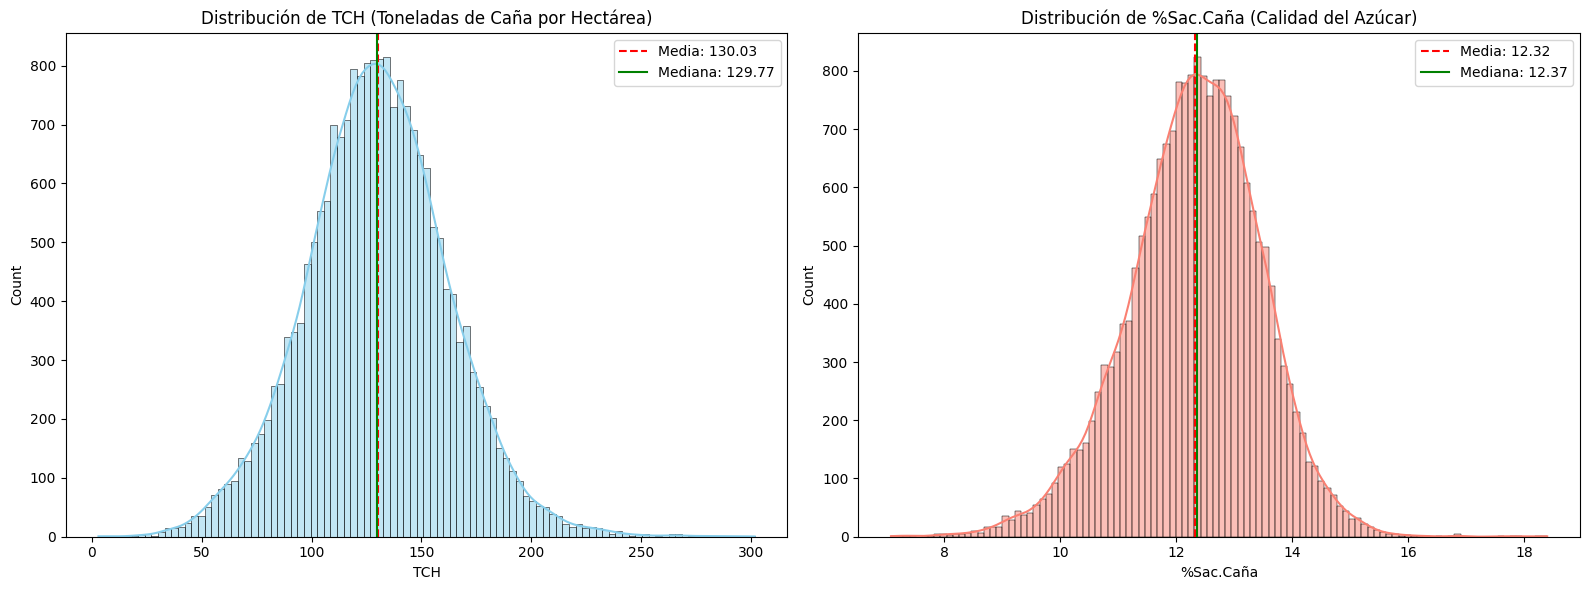

In [20]:
# Visualización de la distribución de TCH y %Sac.Caña
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df['TCH'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de TCH (Toneladas de Caña por Hectárea)')
axes[0].axvline(df['TCH'].mean(), color='red', linestyle='--', label=f"Media: {df['TCH'].mean():.2f}")
axes[0].axvline(df['TCH'].median(), color='green', linestyle='-', label=f"Mediana: {df['TCH'].median():.2f}")
axes[0].legend()

sns.histplot(df['%Sac.Caña'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribución de %Sac.Caña (Calidad del Azúcar)')
axes[1].axvline(df['%Sac.Caña'].mean(), color='red', linestyle='--', label=f"Media: {df['%Sac.Caña'].mean():.2f}")
axes[1].axvline(df['%Sac.Caña'].median(), color='green', linestyle='-', label=f"Mediana: {df['%Sac.Caña'].median():.2f}")
axes[1].legend()

plt.tight_layout()
plt.show()

TCH: La distribución de TCH está ligeramente sesgada a la derecha, con una cola de valores altos. Esto indica que la mayoría de las suertes tienen una productividad promedio, pero unas pocas son excepcionalmente productivas. La media (137.9) es mayor que la mediana (135.2), confirmando el sesgo.

%Sac.Caña: La distribución de %Sac.Caña es más simétrica y se asemeja a una distribución normal, centrada alrededor del 12%. Esto sugiere que la calidad del azúcar es más consistente a lo largo de las cosechas.

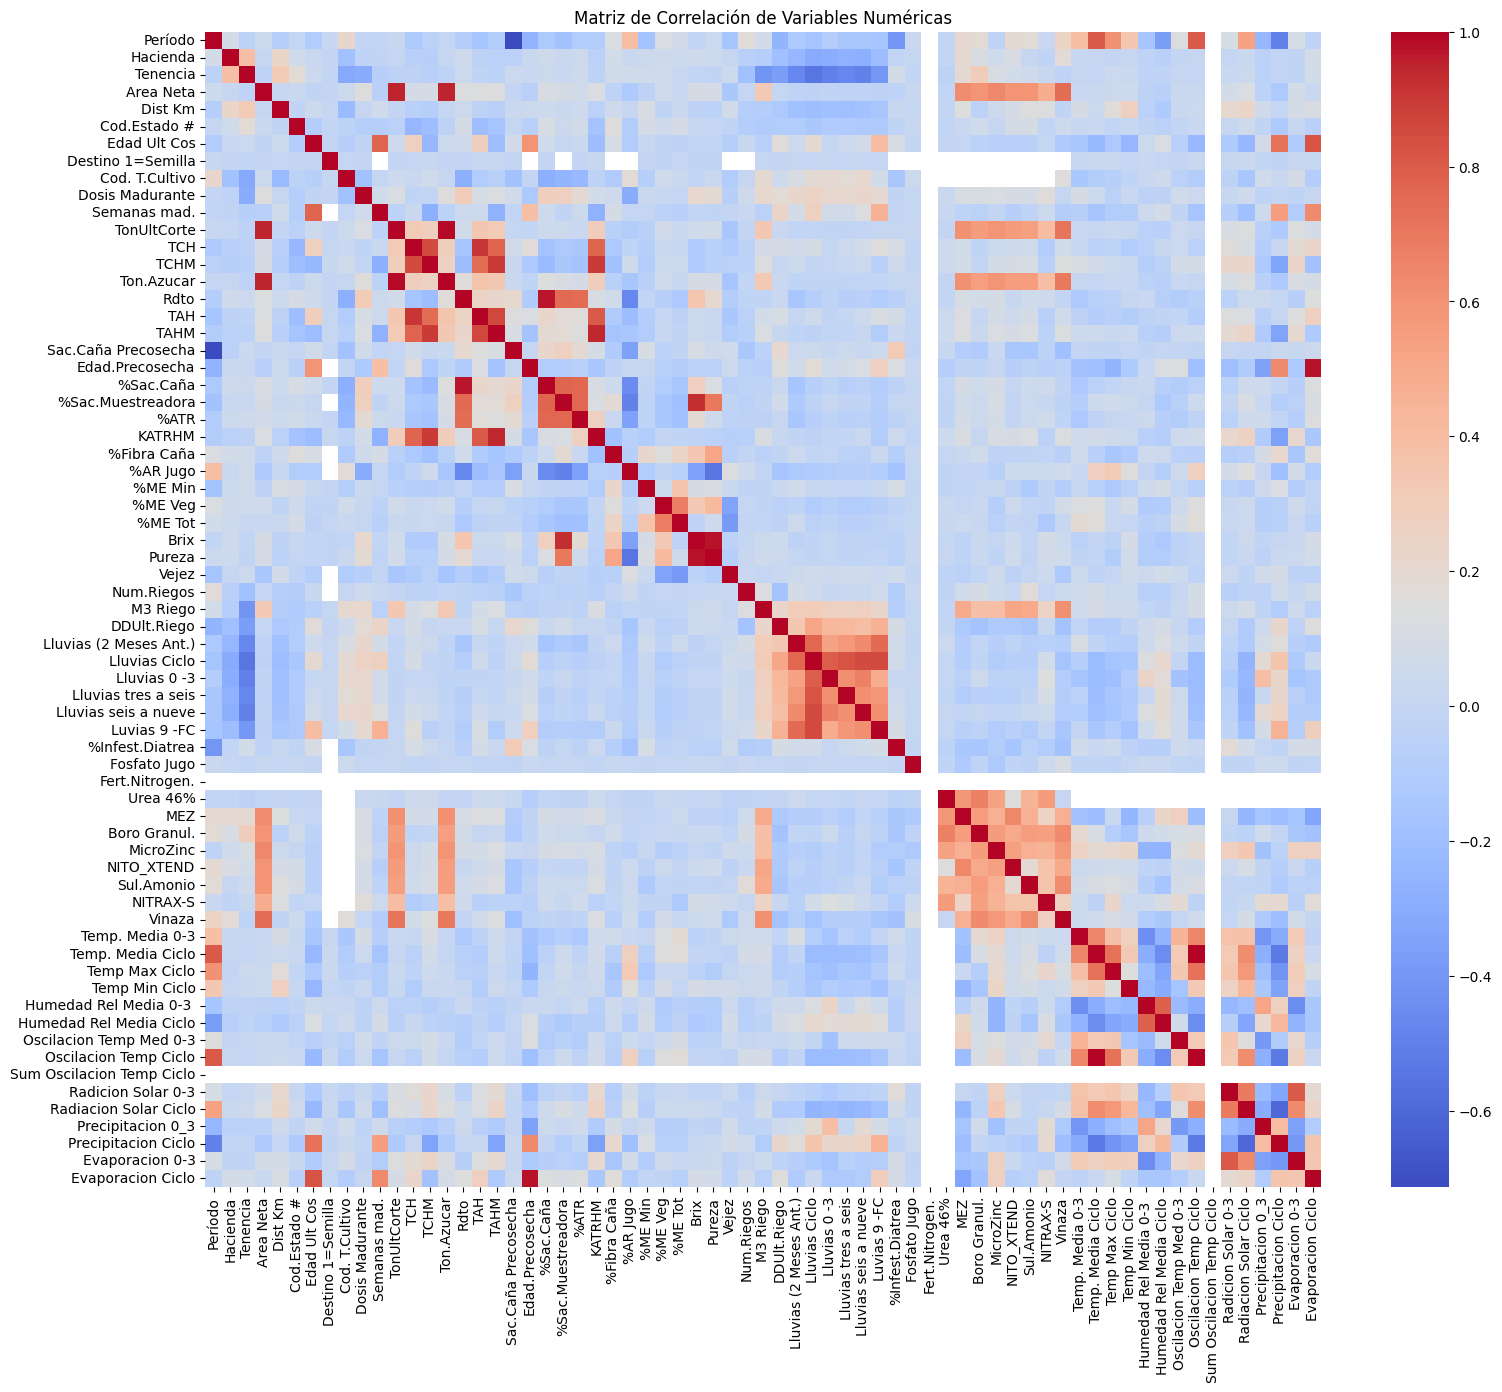


Correlaciones más fuertes con TCH:
TCH                  1.000000
TAH                  0.907843
TCHM                 0.847381
TAHM                 0.774089
KATRHM               0.767925
TonUltCorte          0.316029
Ton.Azucar           0.289917
Edad Ult Cos         0.280524
Evaporacion Ciclo    0.230284
Evaporacion 0-3      0.185291
Name: TCH, dtype: float64

Correlaciones más fuertes con %Sac.Caña:
%Sac.Caña              1.000000
Rdto                   0.970430
%Sac.Muestreadora      0.768583
%ATR                   0.763754
Dosis Madurante        0.288158
Brix                   0.278750
Sac.Caña Precosecha    0.229690
TAH                    0.222309
TAHM                   0.195322
Ton.Azucar             0.140788
Name: %Sac.Caña, dtype: float64


In [21]:
# Seleccionar solo columnas numéricas para la matriz de correlación
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Correlaciones específicas con las variables objetivo
print("\nCorrelaciones más fuertes con TCH:")
print(correlation_matrix['TCH'].sort_values(ascending=False).head(10))
print("\nCorrelaciones más fuertes con %Sac.Caña:")
print(correlation_matrix['%Sac.Caña'].sort_values(ascending=False).head(10))

Interpretación común de la correlación (|r|):

0.0 – 0.1 → correlación despreciable (no útil como predictor).

0.1 – 0.3 → correlación débil (aporta poco, pero puede servir combinada con otras).

0.3 – 0.5 → correlación moderada (empieza a ser relevante).

0.5 – 0.7 → correlación fuerte (muy buen predictor).

0.7 – 0.9 → correlación muy fuerte (a veces indica redundancia con otra variable).

0.9 – 1.0 → casi duplicada (puede ser descartada por colinealidad).

Si buscas buenas predictoras iniciales, céntrate en el rango 0.3 ≤ |r| ≤ 0.7.

Si es mayor a 0.8 o 0.9, revisa si está duplicando la información de otra variable.

Si es menor a 0.2, probablemente no ayude mucho (salvo que el modelo capte relaciones no lineales).

In [22]:
# Correlaciones con TCH entre 0.6 y 0.8
cor_tch = correlation_matrix['TCH']
cor_tch_filtradas = cor_tch[(cor_tch.abs() > 0.6) & (cor_tch.abs() < 0.8)]
print("\nCorrelaciones con TCH entre 0.6 y 0.8:")
print(cor_tch_filtradas)


Correlaciones con TCH entre 0.6 y 0.8:
TAHM      0.774089
KATRHM    0.767925
Name: TCH, dtype: float64


In [23]:
# Correlaciones con %Sac.Caña entre 0.6 y 0.8
cor_sac = correlation_matrix['%Sac.Caña']
cor_sac_filtradas = cor_sac[(cor_sac.abs() > 0.6) & (cor_sac.abs() < 0.8)]
print("\nCorrelaciones con %Sac.Caña entre 0.6 y 0.8:")
print(cor_sac_filtradas)


Correlaciones con %Sac.Caña entre 0.6 y 0.8:
%Sac.Muestreadora    0.768583
%ATR                 0.763754
Name: %Sac.Caña, dtype: float64


In [35]:
# Seleccionar solo columnas numéricas para la matriz de correlación
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

## Variables a no tener en cuenta por tener una correlacion alta

In [51]:
umbral_max = 0.85
umbral_min = 0.3


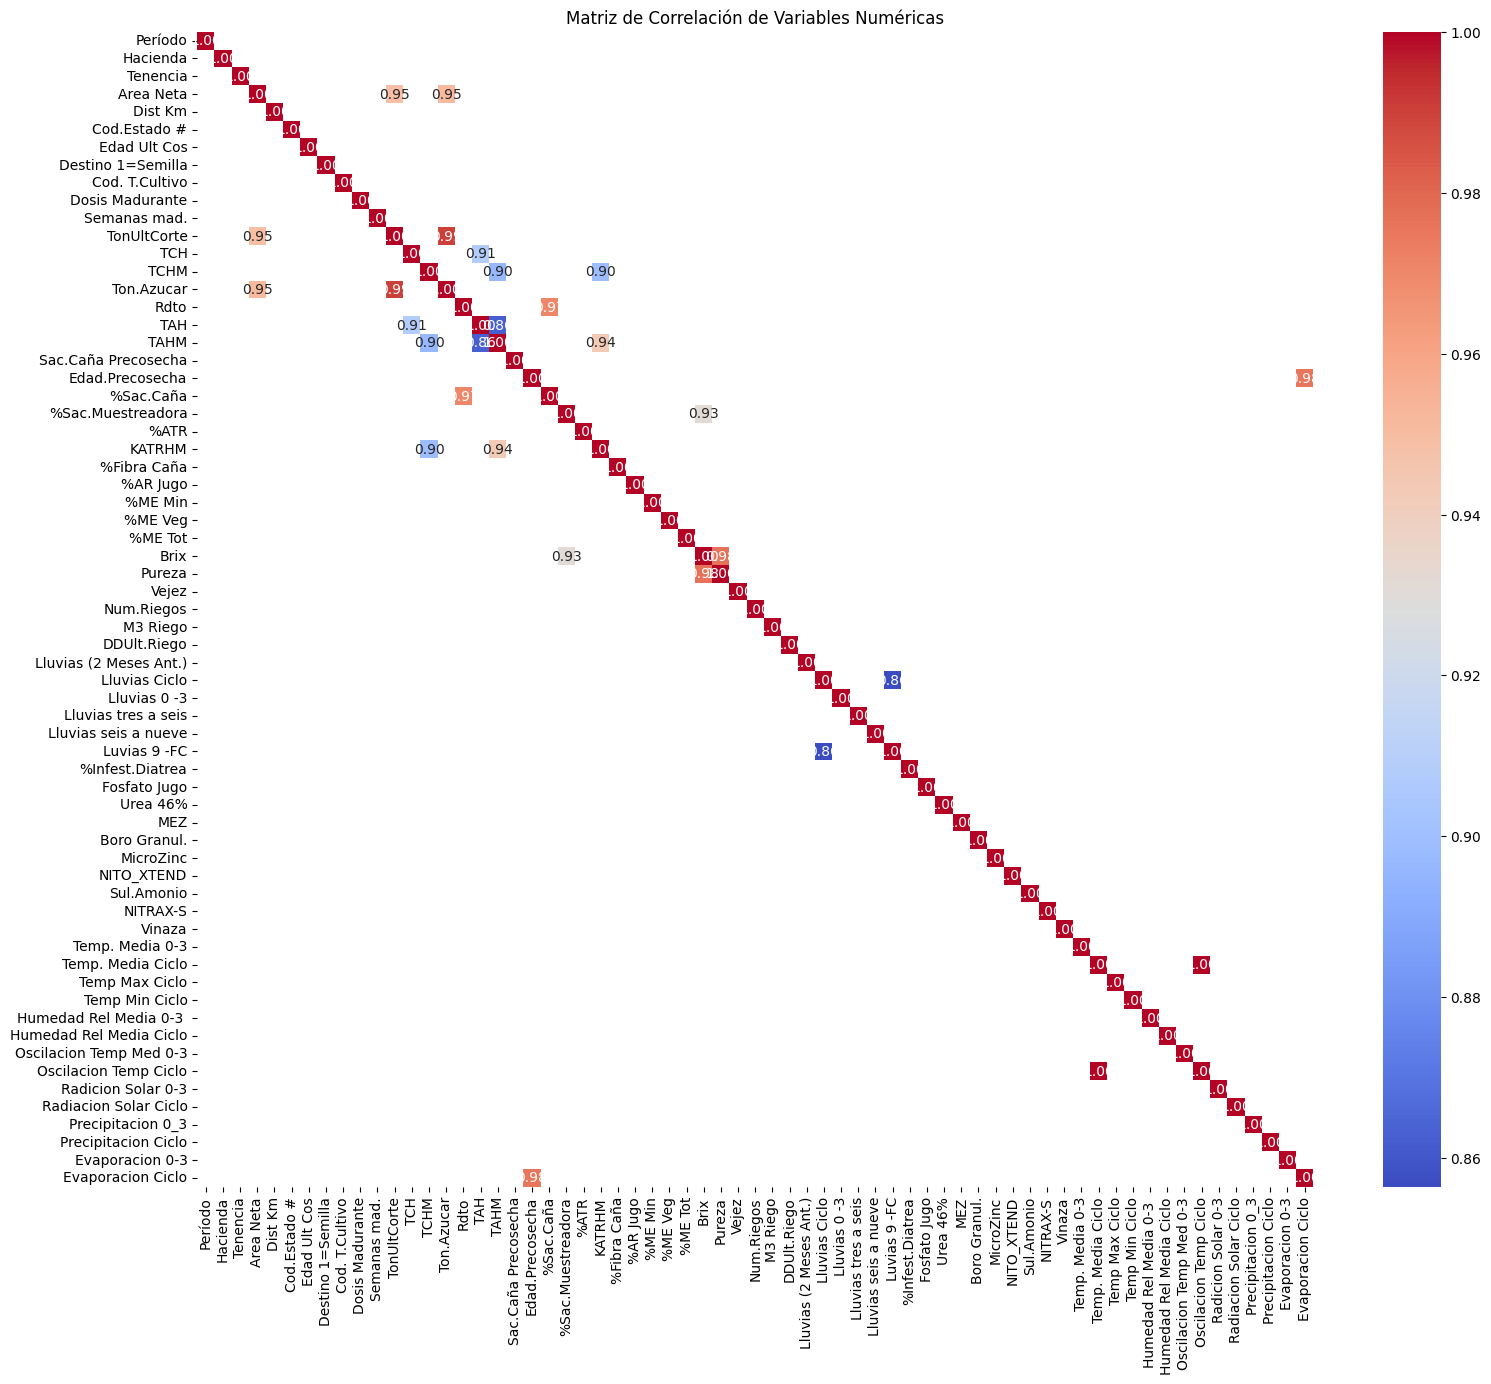


Correlaciones más fuertes con TCH:
TCH                  1.000000
TAH                  0.907843
TCHM                 0.847381
TAHM                 0.774089
KATRHM               0.767925
TonUltCorte          0.316029
Ton.Azucar           0.289917
Edad Ult Cos         0.280524
Evaporacion Ciclo    0.230284
Evaporacion 0-3      0.185291
Name: TCH, dtype: float64

Correlaciones más fuertes con %Sac.Caña:
%Sac.Caña              1.000000
Rdto                   0.970430
%Sac.Muestreadora      0.768583
%ATR                   0.763754
Dosis Madurante        0.288158
Brix                   0.278750
Sac.Caña Precosecha    0.229690
TAH                    0.222309
TAHM                   0.195322
Ton.Azucar             0.140788
Name: %Sac.Caña, dtype: float64


In [52]:
cor_tch_filtradas = correlation_matrix[(correlation_matrix.abs() >= umbral_max)]
# Eliminar filas y columnas con solo NaN
cor_tch_filtradas = cor_tch_filtradas.dropna(how="all", axis=0)  # elimina filas vacías
cor_tch_filtradas = cor_tch_filtradas.dropna(how="all", axis=1)  # elimina columnas vacías

plt.figure(figsize=(18, 15))
sns.heatmap(cor_tch_filtradas, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Correlaciones específicas con las variables objetivo
print("\nCorrelaciones más fuertes con TCH:")
print(correlation_matrix['TCH'].sort_values(ascending=False).head(10))
print("\nCorrelaciones más fuertes con %Sac.Caña:")
print(correlation_matrix['%Sac.Caña'].sort_values(ascending=False).head(10))

In [55]:
def variables_alta_correlacion(df, umbral):
    """
    Retorna una lista de pares de variables cuya correlación 
    absoluta es mayor al umbral (default=0.8).
    """
    # Matriz de correlación
    corr_matrix = df.corr().abs()
    
    # Seleccionar parte superior de la matriz para no repetir pares
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    
    # Encontrar pares con correlación mayor al umbral
    variables_correlacionadas = [
        (col, row, upper.loc[row, col]) 
        for col in upper.columns 
        for row in upper.index 
        if upper.loc[row, col] > umbral
    ]
    
    return variables_correlacionadas

correlaciones_fuertes = variables_alta_correlacion(numeric_cols, umbral=umbral_max)

for var1, var2, corr in correlaciones_fuertes:
    print(f"{var1} - {var2}: {corr:.2f}") 

TonUltCorte - Area Neta: 0.95
Ton.Azucar - Area Neta: 0.95
Ton.Azucar - TonUltCorte: 0.99
TAH - TCH: 0.91
TAHM - TCHM: 0.90
TAHM - TAH: 0.86
%Sac.Caña - Rdto: 0.97
KATRHM - TCHM: 0.90
KATRHM - TAHM: 0.94
Brix - %Sac.Muestreadora: 0.93
Pureza - Brix: 0.98
Luvias 9 -FC - Lluvias Ciclo: 0.86
Oscilacion Temp Ciclo - Temp. Media Ciclo: 1.00
Evaporacion Ciclo - Edad.Precosecha: 0.98


## Variables a seleccionar que tienen buena correlacion

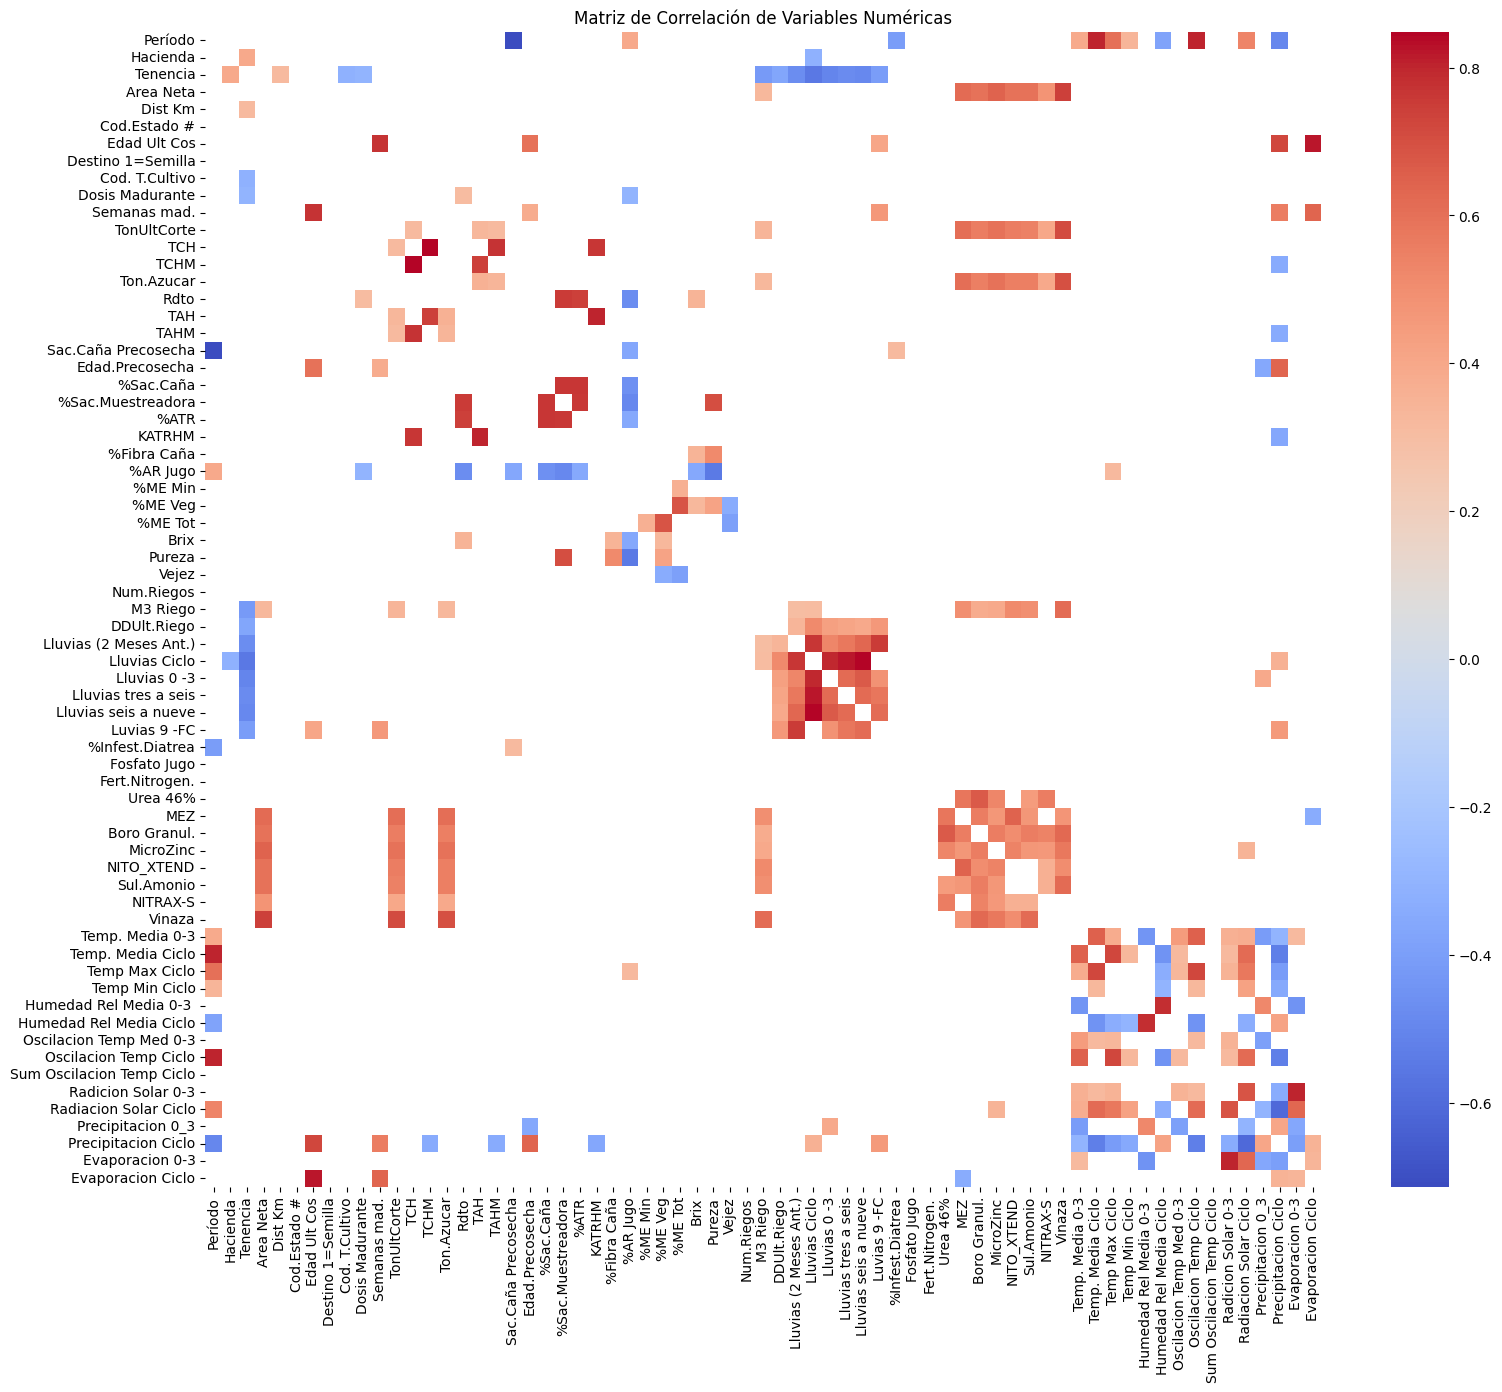


Correlaciones más fuertes con TCH:
TCH                  1.000000
TAH                  0.907843
TCHM                 0.847381
TAHM                 0.774089
KATRHM               0.767925
TonUltCorte          0.316029
Ton.Azucar           0.289917
Edad Ult Cos         0.280524
Evaporacion Ciclo    0.230284
Evaporacion 0-3      0.185291
Name: TCH, dtype: float64

Correlaciones más fuertes con %Sac.Caña:
%Sac.Caña              1.000000
Rdto                   0.970430
%Sac.Muestreadora      0.768583
%ATR                   0.763754
Dosis Madurante        0.288158
Brix                   0.278750
Sac.Caña Precosecha    0.229690
TAH                    0.222309
TAHM                   0.195322
Ton.Azucar             0.140788
Name: %Sac.Caña, dtype: float64


In [ ]:
# Seleccionar solo columnas numéricas para la matriz de correlación
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
cor_tch_filtradas = correlation_matrix[(correlation_matrix.abs() >= umbral_min) & (correlation_matrix.abs() <= umbral_max)]

plt.figure(figsize=(18, 15))
sns.heatmap(cor_tch_filtradas, annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Correlaciones específicas con las variables objetivo
print("\nCorrelaciones más fuertes con TCH:")
print(correlation_matrix['TCH'].sort_values(ascending=False).head(10))
print("\nCorrelaciones más fuertes con %Sac.Caña:")
print(correlation_matrix['%Sac.Caña'].sort_values(ascending=False).head(10))

In [56]:
correlaciones_uso = variables_alta_correlacion(numeric_cols, umbral=umbral_min)

for var1, var2, corr in correlaciones_uso:
    print(f"{var1} - {var2}: {corr:.2f}") 

Tenencia - Hacienda: 0.40
Dist Km - Tenencia: 0.31
Cod. T.Cultivo - Tenencia: 0.31
Dosis Madurante - Tenencia: 0.30
Semanas mad. - Edad Ult Cos: 0.77
TonUltCorte - Area Neta: 0.95
TCH - TonUltCorte: 0.32
TCHM - TCH: 0.85
Ton.Azucar - Area Neta: 0.95
Ton.Azucar - TonUltCorte: 0.99
Rdto - Dosis Madurante: 0.31
TAH - TonUltCorte: 0.34
TAH - TCH: 0.91
TAH - TCHM: 0.74
TAH - Ton.Azucar: 0.35
TAHM - TonUltCorte: 0.32
TAHM - TCH: 0.77
TAHM - TCHM: 0.90
TAHM - Ton.Azucar: 0.34
TAHM - TAH: 0.86
Sac.Caña Precosecha - Período: 0.71
Edad.Precosecha - Edad Ult Cos: 0.60
Edad.Precosecha - Semanas mad.: 0.38
%Sac.Caña - Rdto: 0.97
%Sac.Muestreadora - Rdto: 0.75
%Sac.Muestreadora - %Sac.Caña: 0.77
%ATR - Rdto: 0.74
%ATR - %Sac.Caña: 0.76
%ATR - %Sac.Muestreadora: 0.76
KATRHM - TCH: 0.77
KATRHM - TCHM: 0.90
KATRHM - TAH: 0.80
KATRHM - TAHM: 0.94
%AR Jugo - Período: 0.40
%AR Jugo - Dosis Madurante: 0.30
%AR Jugo - Rdto: 0.47
%AR Jugo - Sac.Caña Precosecha: 0.36
%AR Jugo - %Sac.Caña: 0.46
%AR Jugo - %Sac

### Para TCH: 
No hay variables con una correlación superior a 0.6. Las más cercanas son TonUltCorte (0.58) y Num.Riegos (0.33), lo que sugiere que la productividad anterior y el riego son factores importantes, pero la relación no es extremadamente fuerte.

### Para %Sac.Caña:
Positivas: %Sac.Muestreadora (0.97) y %ATR (0.98) son casi perfectamente correlacionadas. Esto es esperado, ya que son métricas de calidad muy similares. Pureza (0.81) y Brix (0.80) también muestran una fuerte correlación positiva, lo cual es lógicamente consistente.

Negativas: %Fibra Caña (-0.66) tiene una fuerte correlación negativa, indicando que a mayor fibra, menor es la concentración de sacarosa.

# Seleccion de variables categoricas

In [57]:
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'F.Siembra', 'D.S.', 'Ult.Riego', 'F.Ult.Corte', 'Cultivo', 'Fec.Madur.', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó', 'Codigo Estacion']


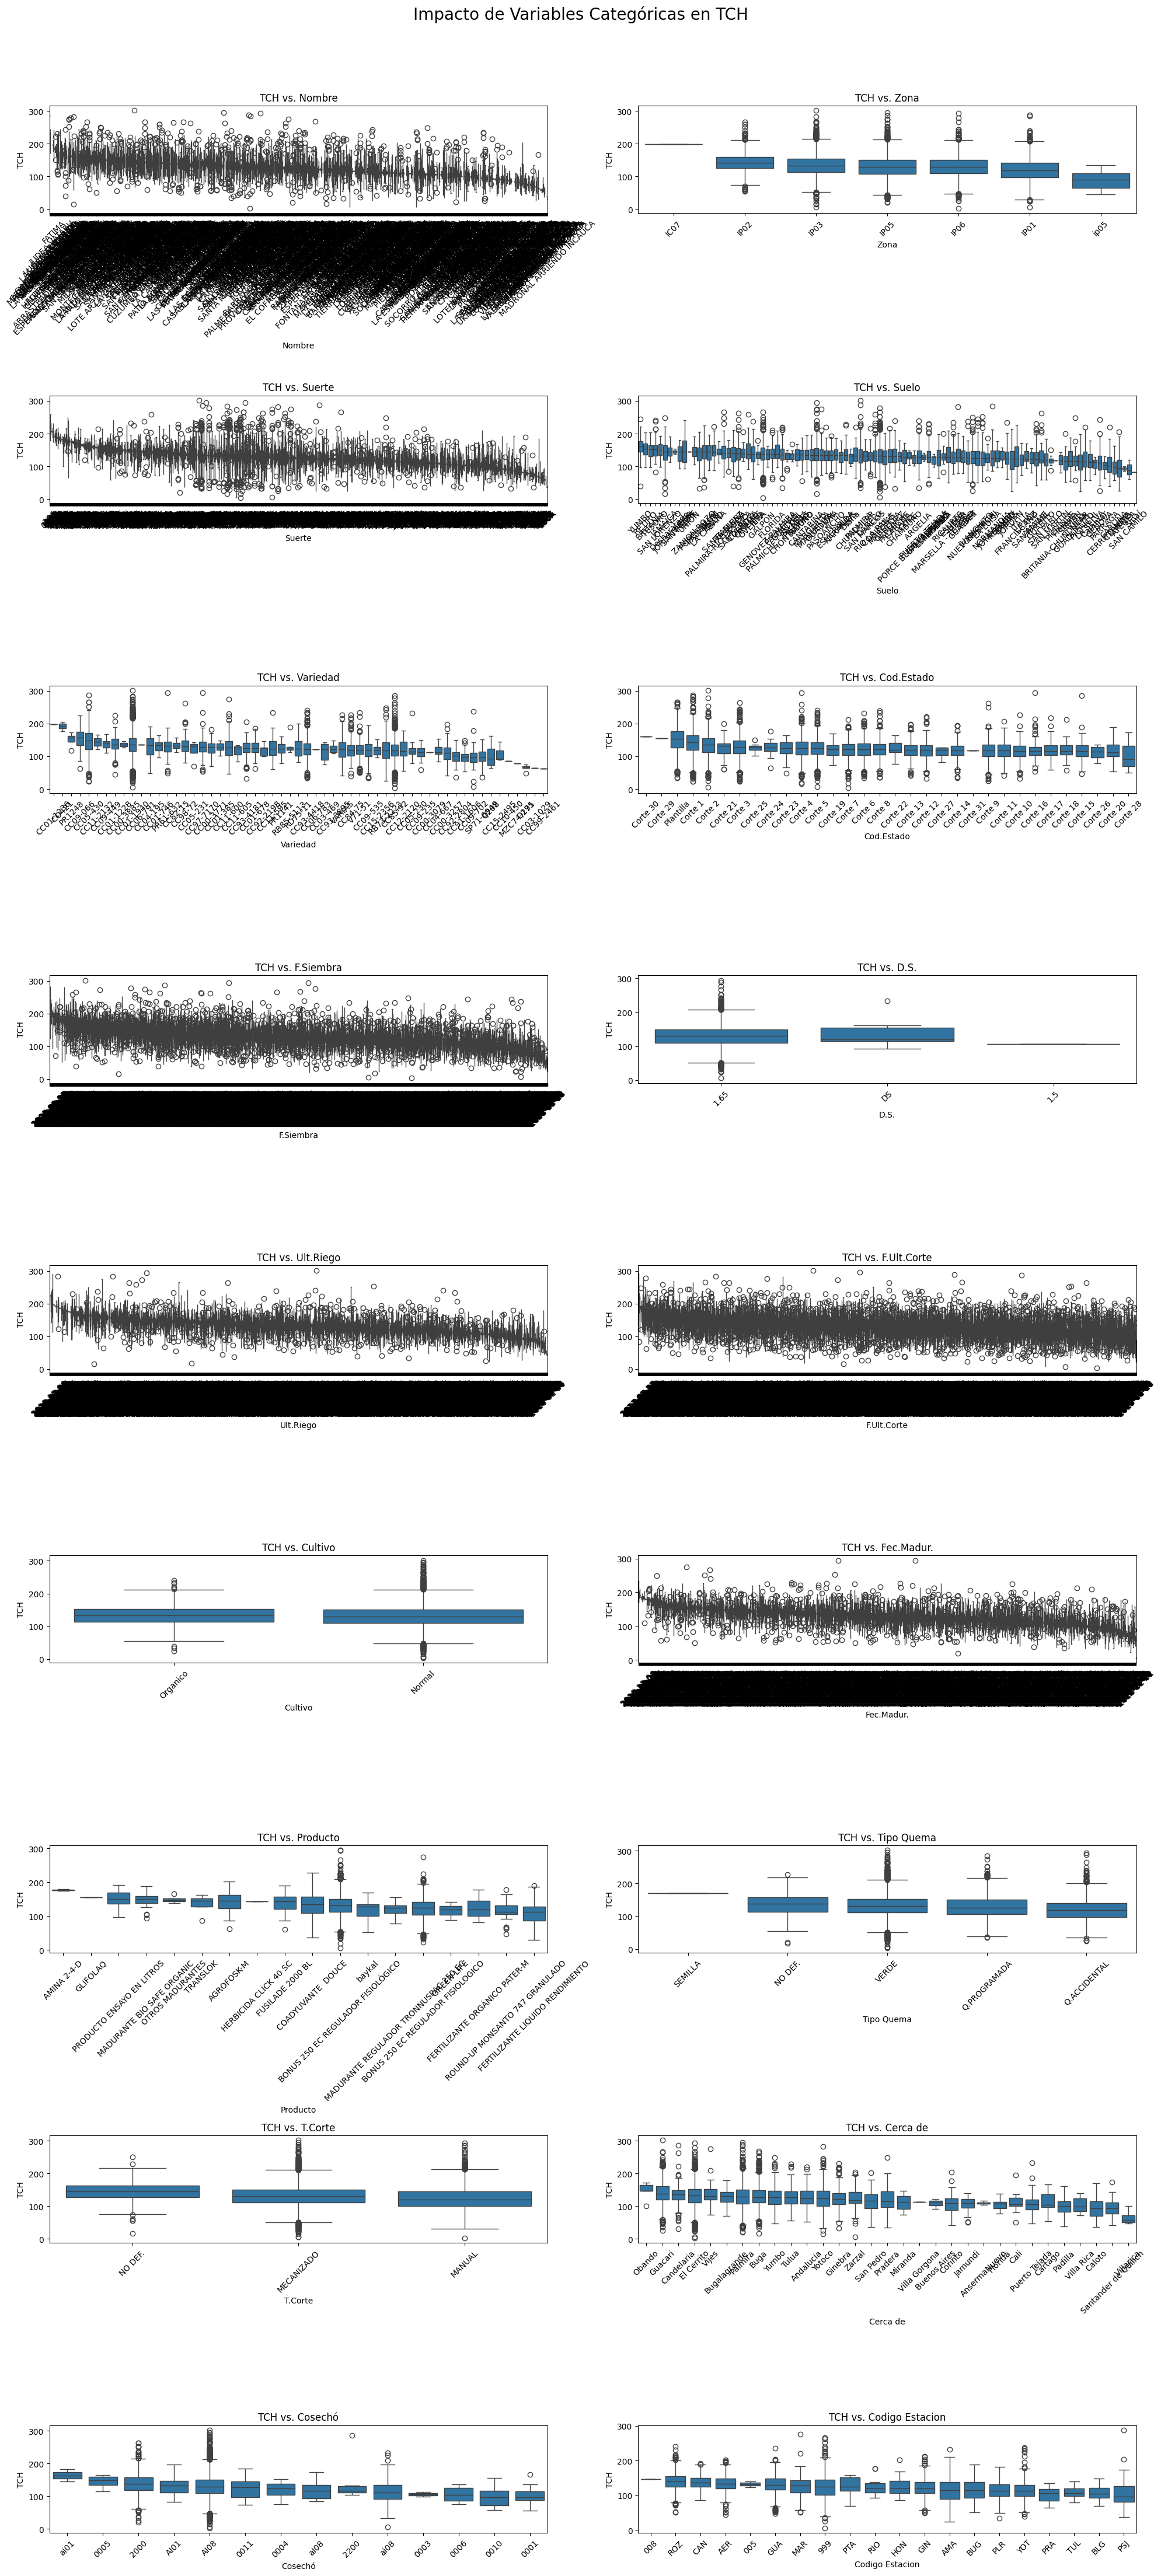

In [64]:
import math

# Número de variables categóricas
n = len(categorical_features)

# Definir número de columnas (ej. 2 o 3 según prefieras)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
fig.suptitle('Impacto de Variables Categóricas en TCH', fontsize=20)

# Asegurar que axes sea 2D
axes = axes.flatten()

# Para TCH
for i, feature in enumerate(categorical_features):
    order = df.groupby(feature)['TCH'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=feature, y='TCH', ax=axes[i], order=order)
    axes[i].set_title(f'TCH vs. {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Ocultar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

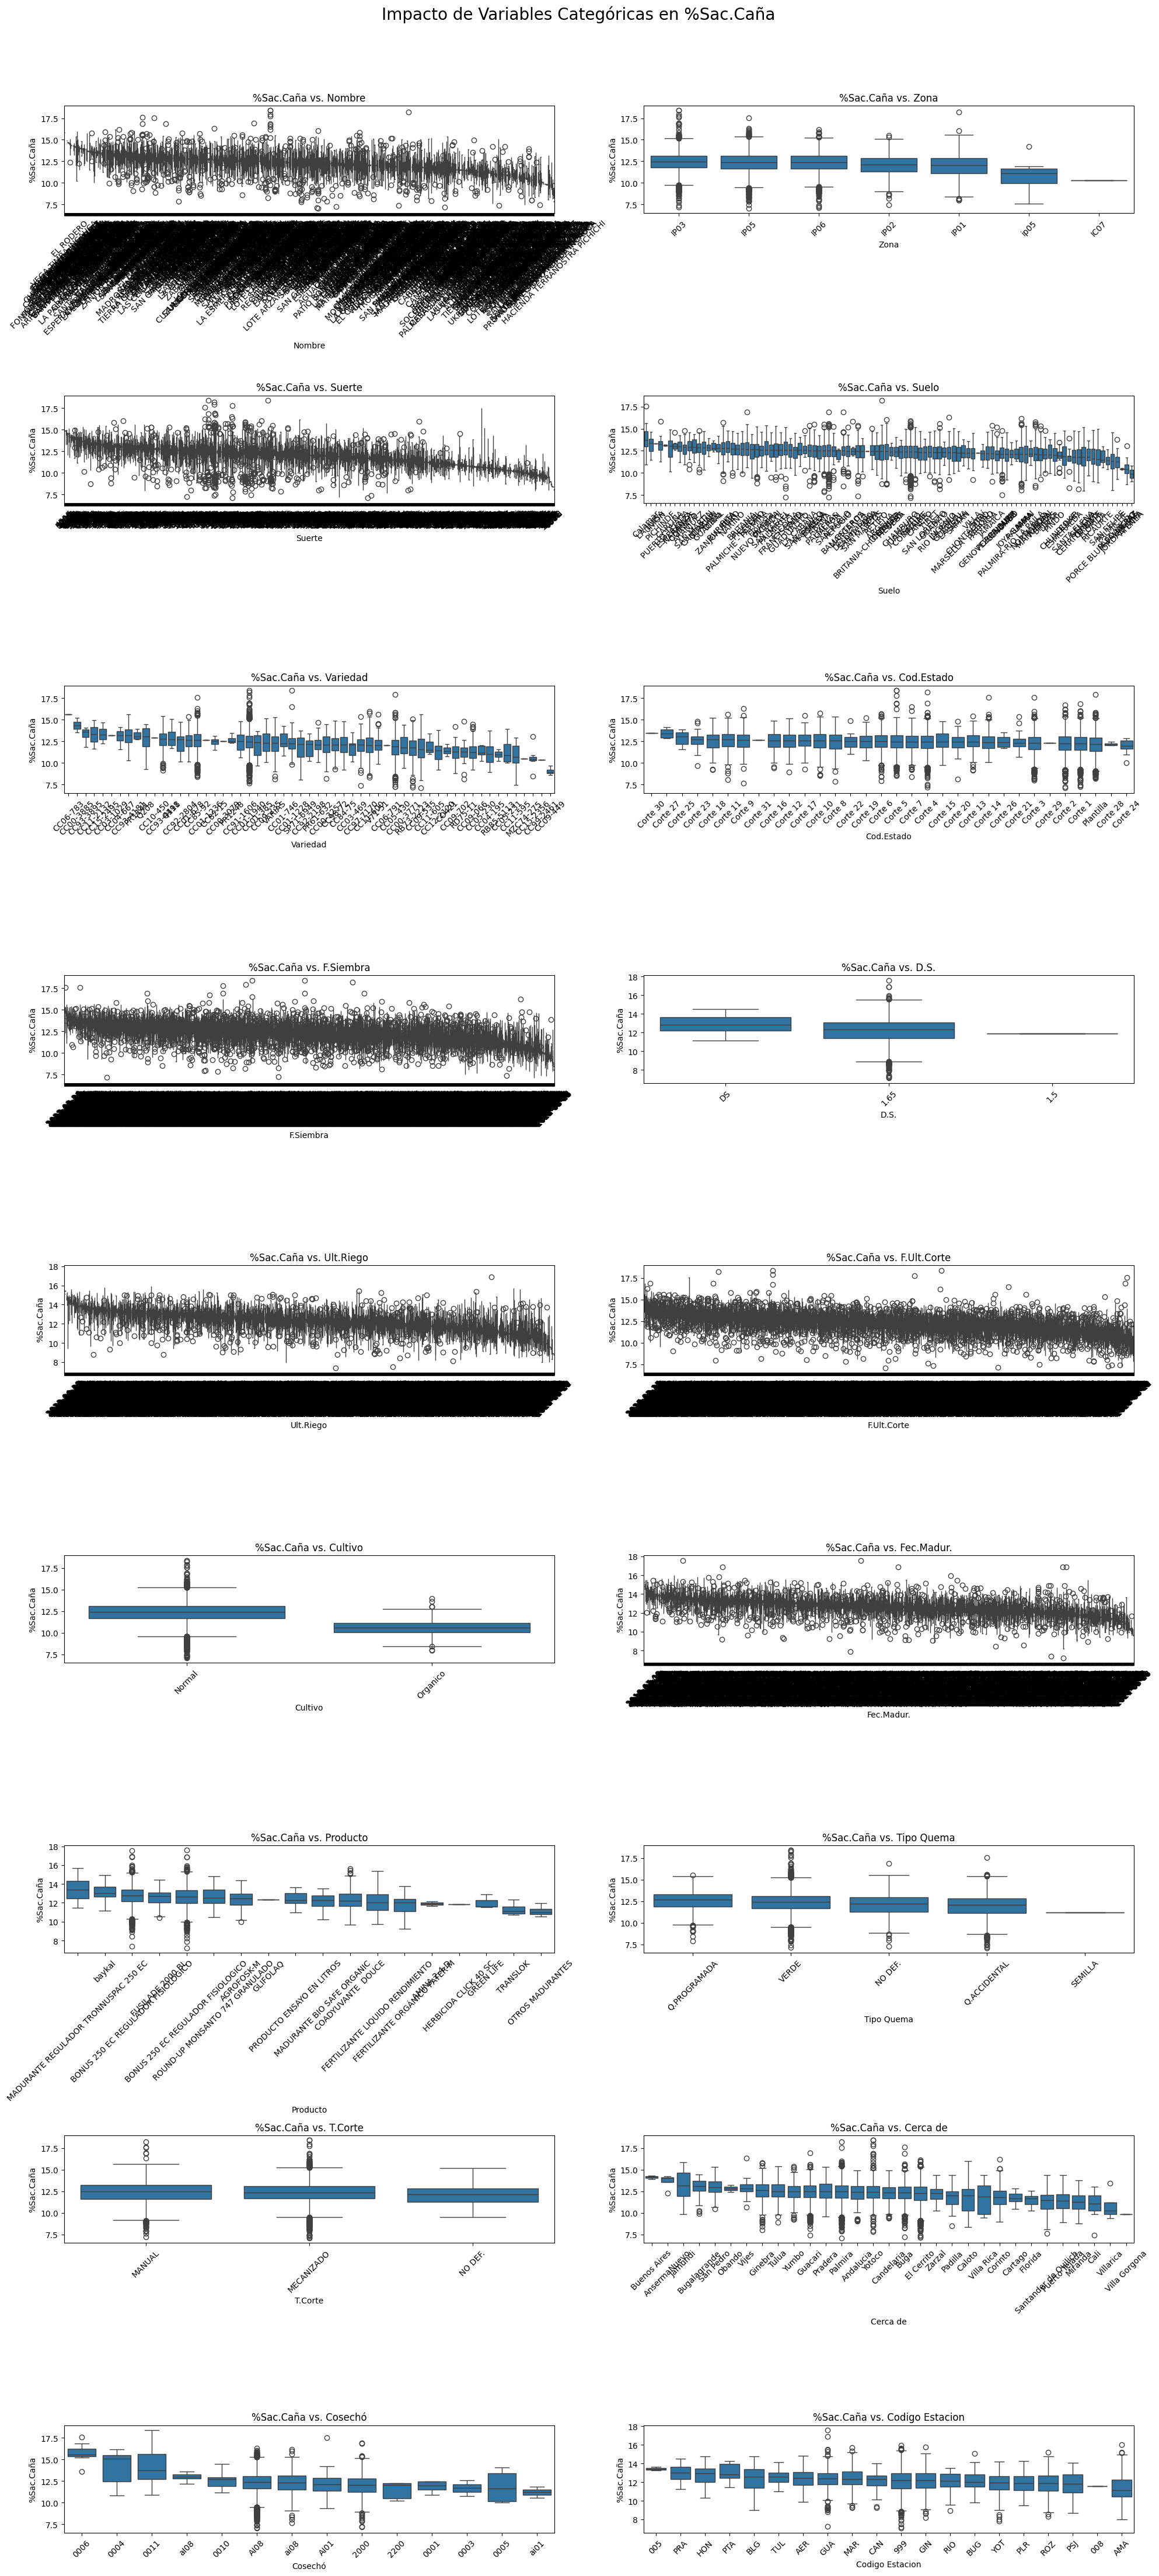

In [65]:
# Para %Sac.Caña
import math

# Número de variables categóricas
n = len(categorical_features)

# Definir número de columnas (ej. 2, puedes poner 3 si quieres más compacto)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
fig.suptitle('Impacto de Variables Categóricas en %Sac.Caña', fontsize=20)

# Asegurar que axes siempre sea 1D
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    order = df.groupby(feature)['%Sac.Caña'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=feature, y='%Sac.Caña', ax=axes[i], order=order)
    axes[i].set_title(f'%Sac.Caña vs. {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Variedad: Ciertas variedades de caña muestran medianas de TCH y %Sac.Caña claramente distintas, lo que la convierte en una variable predictiva muy prometedora.

Suelo: El tipo de suelo tiene un impacto visible tanto en la productividad como en la calidad. Algunos suelos consistentemente superan a otros.

Tenencia y Tipo de Corte: Estas variables también muestran diferencias en las distribuciones de las variables objetivo, aunque menos pronunciadas que la variedad y el suelo.

# Selección Estratégica de Características

## Exclusiones 

* Identificadores únicos: Hacienda, Nombre, Suerte. Estas columnas no generalizan y causarían sobreajuste.
* Fuga de Datos (Data Leakage): Ton.Azucar, Rdto, TAH, TAHM, TonUltCorte. Estas son calculadas después de la cosecha y no estarán disponibles al momento de hacer una predicción. Incluirlas daría resultados artificialmente perfectos.
* Redundancia y Metadatos: Cod.Estado # (redundante con Cod.Estado), Codigo Estacion (metadato sin valor predictivo directo).


In [68]:
for item in ['Nombre', 'Zona', 'Suerte']:
    categorical_features.remove(item)

categorical_features

['Suelo',
 'Variedad',
 'Cod.Estado',
 'F.Siembra',
 'D.S.',
 'Ult.Riego',
 'F.Ult.Corte',
 'Cultivo',
 'Fec.Madur.',
 'Producto',
 'Tipo Quema',
 'T.Corte',
 'Cerca de',
 'Cosechó',
 'Codigo Estacion']

In [79]:
date_cols = [col for col in categorical_features if 'fec' in col.lower() or 'f.' in col.lower()]
date_cols

['F.Siembra', 'F.Ult.Corte', 'Fec.Madur.']

In [80]:
df[date_cols]

F.Siembra F.Ult.Corte Fec.Madur.
0     2010-08-20  2017-01-02 2016-11-04
1     2011-01-27  2017-01-02        NaT
2     2011-10-25  2017-01-02 2016-11-04
3     2014-03-08  2017-01-02        NaT
4     2013-01-10  2017-01-02        NaT
...          ...         ...        ...
20970 2018-09-06  2024-06-30 2024-04-29
20971 2015-08-03  2024-06-30 2024-04-05
20972 2018-09-06  2024-06-30 2024-04-29
20973 2019-12-31  2024-06-30 2024-05-30
20974 2023-06-29  2024-06-30 2024-05-25

[20578 rows x 3 columns]

In [81]:
# 2. Convertir columnas a formato datetime (muy importante)
# El argumento 'coerce' convierte fechas inválidas en NaT (Not a Time)
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# 3. ESTRATEGIA 1: Descomposición de Fechas
# Extraemos el mes y el año de la fecha de siembra y último corte
df['Mes_Siembra'] = df['F.Siembra'].dt.month
df['Año_Siembra'] = df['F.Siembra'].dt.year

df['Mes_Ult_Corte'] = df['F.Ult.Corte'].dt.month
df['Año_Ult_Corte'] = df['F.Ult.Corte'].dt.year

df['Mes_Madur'] = df['Fec.Madur.'].dt.month
df['Año_Madur'] = df['Fec.Madur.'].dt.year

KeyError: 'F.Siembra'

In [ ]:
# 5. Visualizar las nuevas características creadas
# Seleccionamos las columnas originales y las nuevas para ver el resultado
new_features_df = df[date_cols + [
    'Mes_Siembra', 
    'Año_Siembra', 
    'Mes_Ult_Corte', 
    'Año_Ult_Corte', 
    'Mes_Madur', 
    'Año_Madur'
    ]]
print("DataFrame con las nuevas características de fecha:")
print(new_features_df.head())

DataFrame con las nuevas características de fecha:
   F.Siembra F.Ult.Corte Fec.Madur.  Mes_Siembra  Año_Siembra  Mes_Ult_Corte  \
0 2010-08-20  2017-01-02 2016-11-04            8         2010              1   
1 2011-01-27  2017-01-02        NaT            1         2011              1   
2 2011-10-25  2017-01-02 2016-11-04           10         2011              1   
3 2014-03-08  2017-01-02        NaT            3         2014              1   
4 2013-01-10  2017-01-02        NaT            1         2013              1   

   Año_Ult_Corte  Mes_Madur  Año_Madur  
0           2017       11.0     2016.0  
1           2017        NaN        NaN  
2           2017       11.0     2016.0  
3           2017        NaN        NaN  
4           2017        NaN        NaN  


In [92]:
for col in date_cols:
    categorical_features.remove(col)
categorical_features

['Suelo',
 'Variedad',
 'Cod.Estado',
 'D.S.',
 'Ult.Riego',
 'Cultivo',
 'Producto',
 'Tipo Quema',
 'T.Corte',
 'Cerca de',
 'Cosechó',
 'Codigo Estacion']

In [93]:
for col in [
    'Mes_Siembra', 
    'Año_Siembra', 
    'Mes_Ult_Corte', 
    'Año_Ult_Corte', 
    'Mes_Madur', 
    'Año_Madur'
    ]:
    categorical_features.append(col)
categorical_features

['Suelo',
 'Variedad',
 'Cod.Estado',
 'D.S.',
 'Ult.Riego',
 'Cultivo',
 'Producto',
 'Tipo Quema',
 'T.Corte',
 'Cerca de',
 'Cosechó',
 'Codigo Estacion',
 'Mes_Siembra',
 'Año_Siembra',
 'Mes_Ult_Corte',
 'Año_Ult_Corte',
 'Mes_Madur',
 'Año_Madur']

In [96]:
df[['Año_Madur']]

Año_Madur
0         2016.0
1            NaN
2         2016.0
3            NaN
4            NaN
...          ...
20970     2024.0
20971     2024.0
20972     2024.0
20973     2024.0
20974     2024.0

[20578 rows x 1 columns]

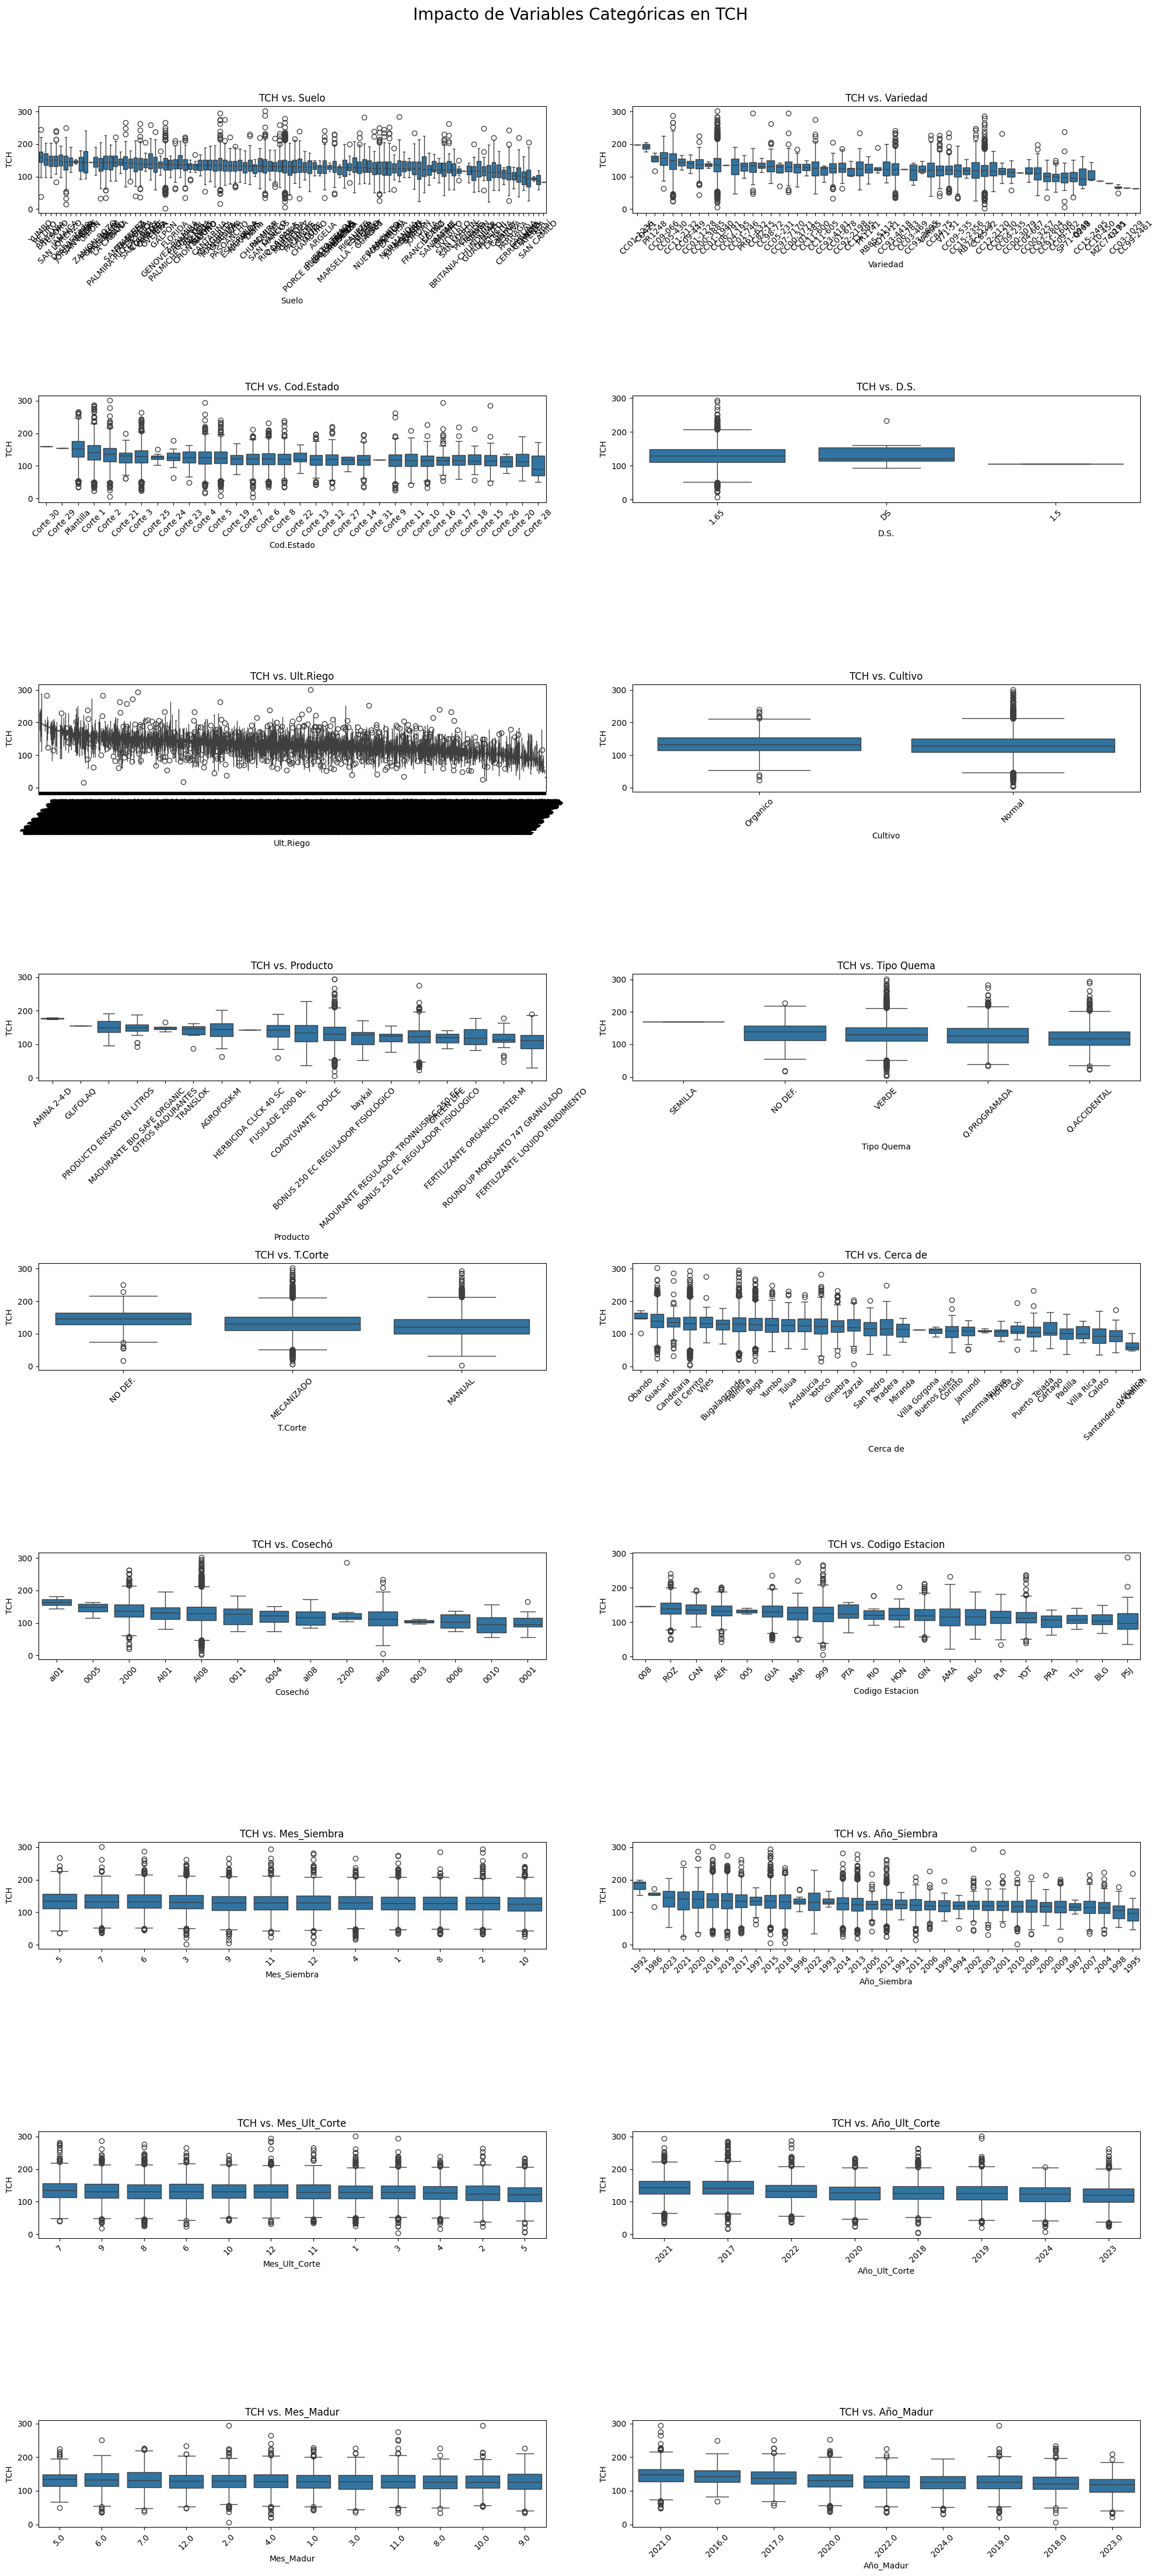

In [94]:
# Número de variables categóricas
n = len(categorical_features)

# Definir número de columnas (ej. 2 o 3 según prefieras)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
fig.suptitle('Impacto de Variables Categóricas en TCH', fontsize=20)

# Asegurar que axes sea 2D
axes = axes.flatten()

# Para TCH
for i, feature in enumerate(categorical_features):
    order = df.groupby(feature)['TCH'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=feature, y='TCH', ax=axes[i], order=order)
    axes[i].set_title(f'TCH vs. {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Ocultar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [98]:
df['Mes_Riego'] = df['Ult.Riego'].dt.month
df['Año_Riego'] = df['Ult.Riego'].dt.year

In [99]:
date_cols

['F.Siembra', 'F.Ult.Corte', 'Fec.Madur.']

In [100]:
# Seleccionamos las columnas originales y las nuevas para ver el resultado
new_features_df = df[[
    'Ult.Riego', 
    'Mes_Riego', 
    'Año_Riego', 
    ]]
print("DataFrame con las nuevas características de fecha:")
print(new_features_df.head())

DataFrame con las nuevas características de fecha:
   Ult.Riego  Mes_Riego  Año_Riego
0        NaT        NaN        NaN
1        NaT        NaN        NaN
2 2016-09-17        9.0     2016.0
3        NaT        NaN        NaN
4        NaT        NaN        NaN


In [101]:
categorical_features.remove('Ult.Riego')
categorical_features

['Suelo',
 'Variedad',
 'Cod.Estado',
 'D.S.',
 'Cultivo',
 'Producto',
 'Tipo Quema',
 'T.Corte',
 'Cerca de',
 'Cosechó',
 'Codigo Estacion',
 'Mes_Siembra',
 'Año_Siembra',
 'Mes_Ult_Corte',
 'Año_Ult_Corte',
 'Mes_Madur',
 'Año_Madur']

In [102]:
categorical_features.append('Mes_Riego')
categorical_features.append('Año_Riego')
categorical_features

['Suelo',
 'Variedad',
 'Cod.Estado',
 'D.S.',
 'Cultivo',
 'Producto',
 'Tipo Quema',
 'T.Corte',
 'Cerca de',
 'Cosechó',
 'Codigo Estacion',
 'Mes_Siembra',
 'Año_Siembra',
 'Mes_Ult_Corte',
 'Año_Ult_Corte',
 'Mes_Madur',
 'Año_Madur',
 'Mes_Riego',
 'Año_Riego']

In [89]:
# 6. Limpieza final
# Ahora podemos eliminar las columnas de fecha originales antes de entrenar el modelo
df.drop(columns=date_cols, inplace=True)

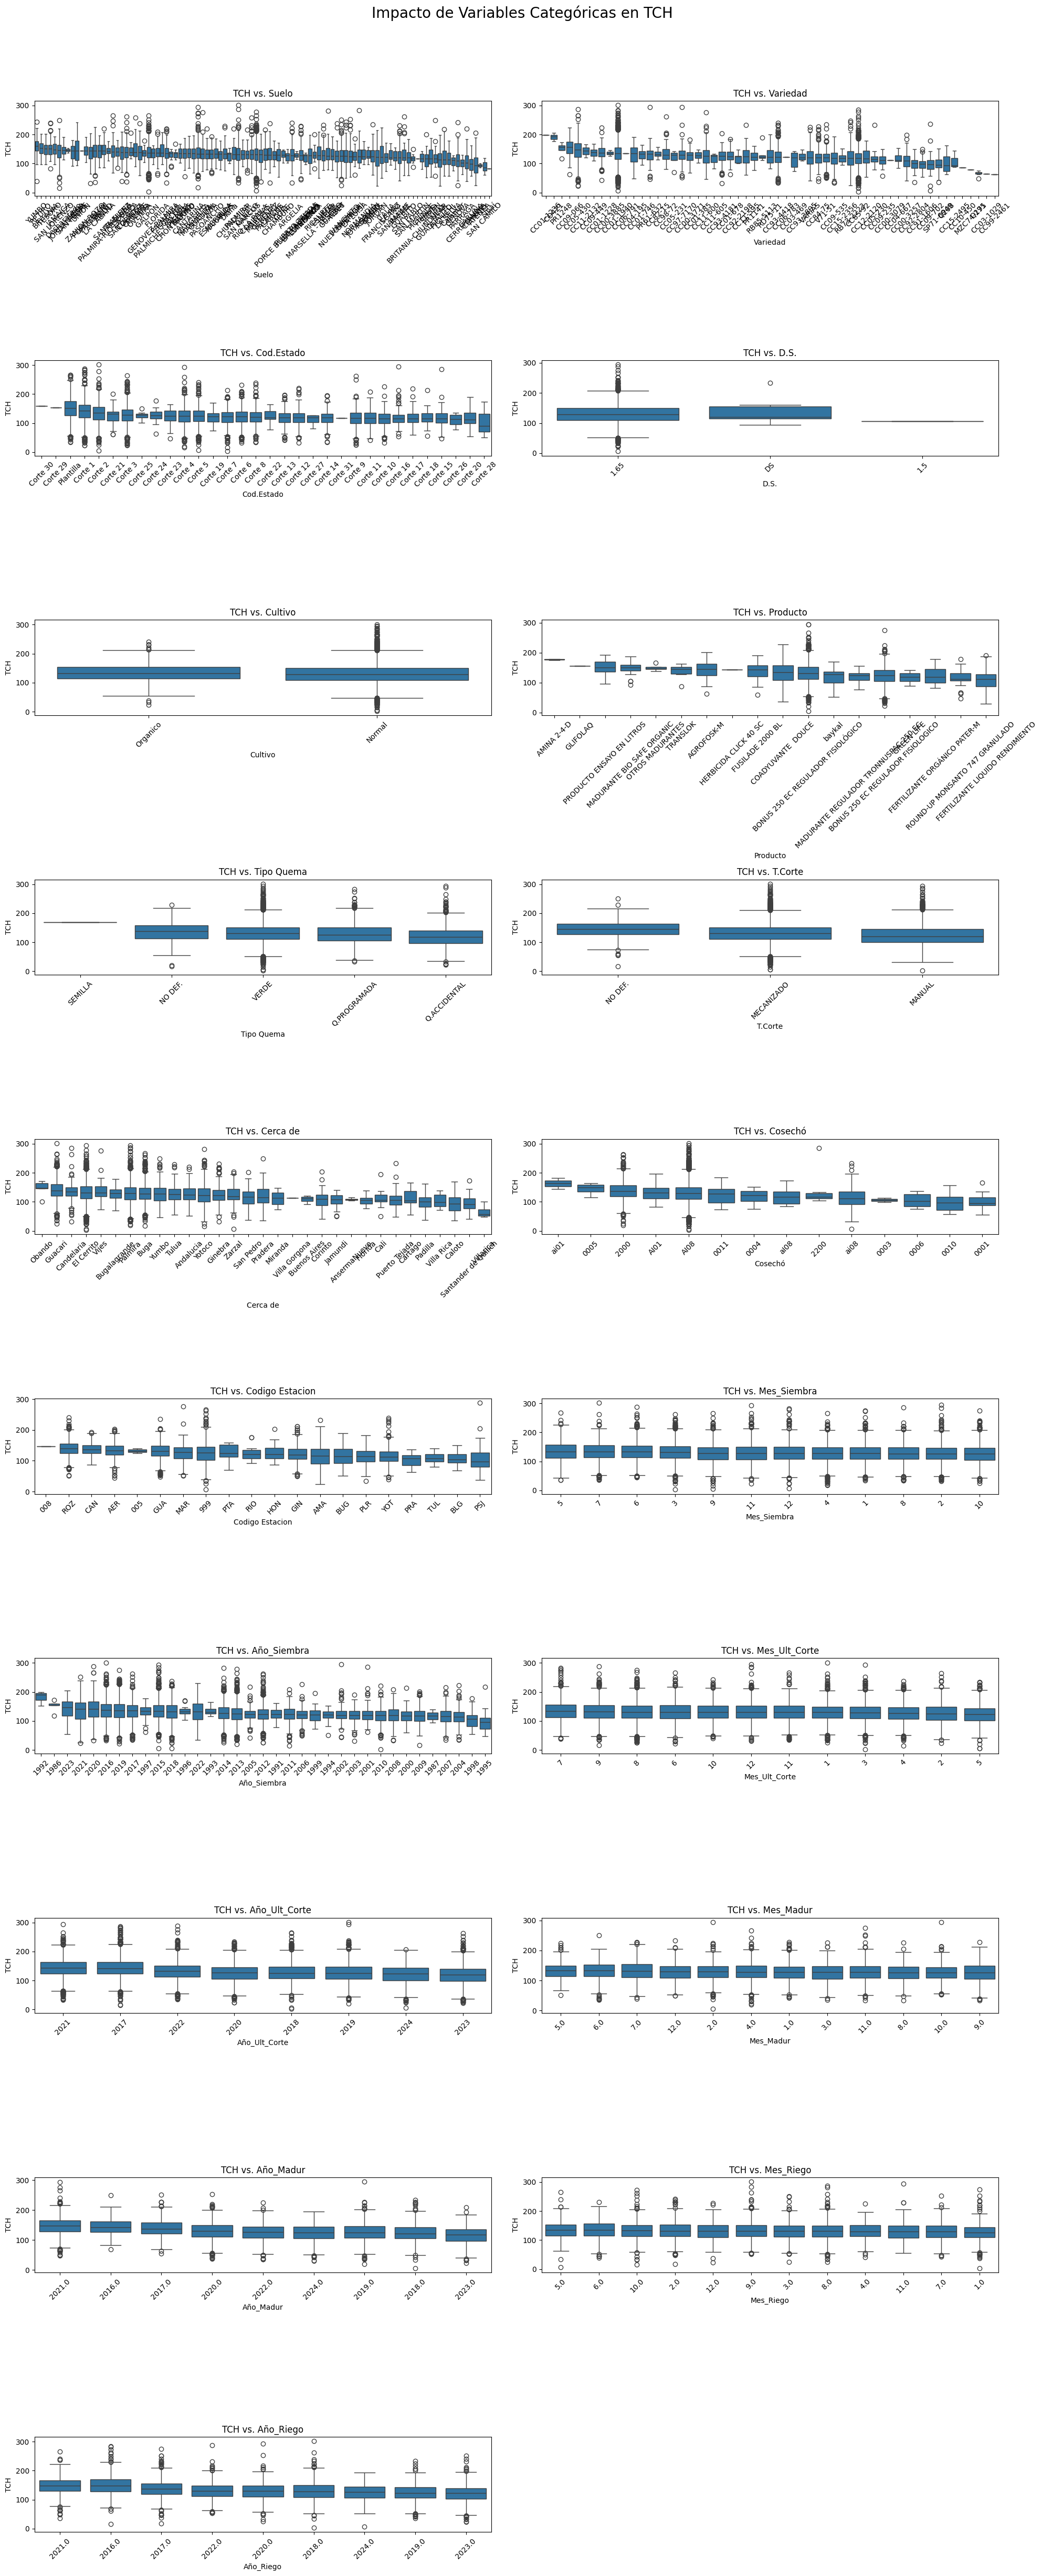

In [103]:
# Número de variables categóricas
n = len(categorical_features)

# Definir número de columnas (ej. 2 o 3 según prefieras)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
fig.suptitle('Impacto de Variables Categóricas en TCH', fontsize=20)

# Asegurar que axes sea 2D
axes = axes.flatten()

# Para TCH
for i, feature in enumerate(categorical_features):
    order = df.groupby(feature)['TCH'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=feature, y='TCH', ax=axes[i], order=order)
    axes[i].set_title(f'TCH vs. {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Ocultar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

¡Por supuesto! Analicemos en profundidad la variable Variedad. Esta es, sin duda, una de las características más importantes en agronomía, y tratarla correctamente puede mejorar significativamente el rendimiento del modelo.

Siguiendo nuestro enfoque, primero la analizaremos a fondo y luego definiremos la mejor estrategia para incluirla en el modelo.

In [104]:
# Contar el número de variedades únicas (Cardinalidad)
num_variedades = df['Variedad'].nunique()
print(f"Número total de variedades únicas: {num_variedades}")

Número total de variedades únicas: 57


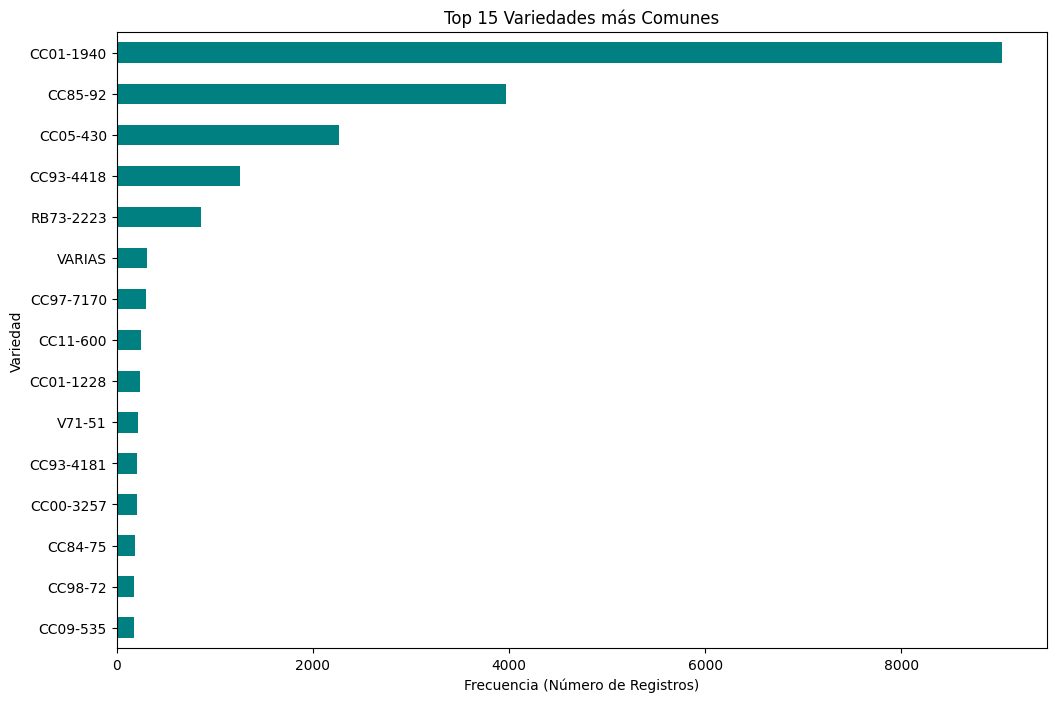

In [105]:
# Ver la frecuencia de las 15 variedades más comunes
plt.figure(figsize=(12, 8))
df['Variedad'].value_counts().nlargest(15).plot(kind='barh', color='teal')
plt.title('Top 15 Variedades más Comunes')
plt.xlabel('Frecuencia (Número de Registros)')
plt.gca().invert_yaxis() # Poner la más común arriba
plt.show()

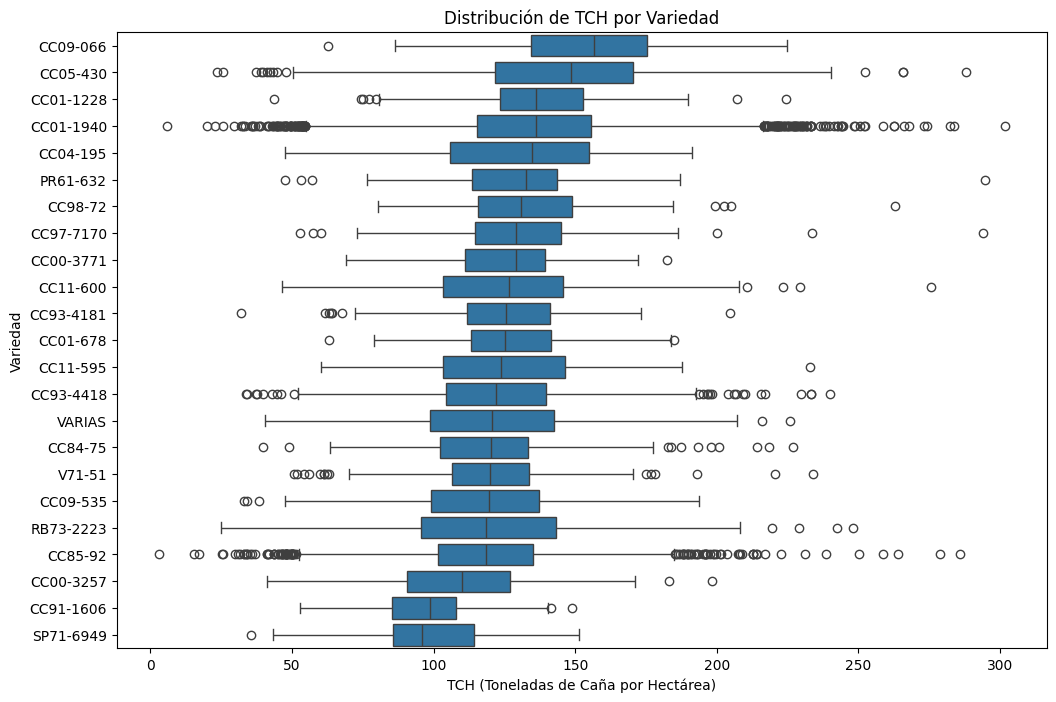

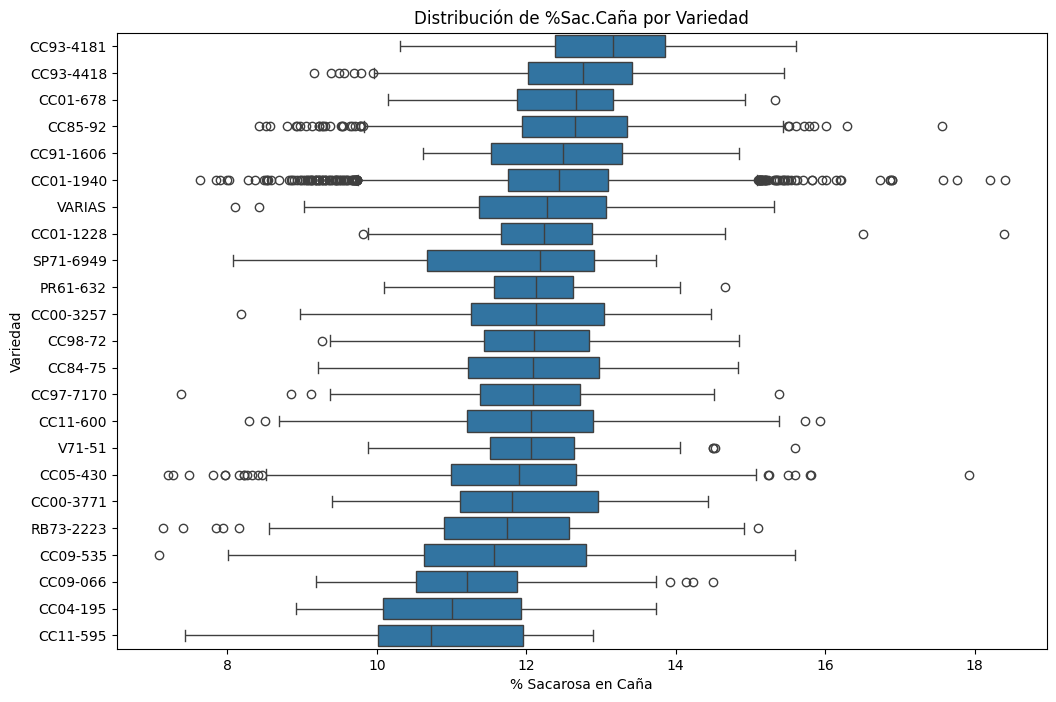

In [106]:
# Agrupar por variedad y calcular la mediana de las variables objetivo
impacto_variedad = df.groupby('Variedad').agg(
    TCH_Mediana=pd.NamedAgg(column='TCH', aggfunc='median'),
    Sac_Caña_Mediana=pd.NamedAgg(column='%Sac.Caña', aggfunc='median'),
    Frecuencia=pd.NamedAgg(column='Variedad', aggfunc='count')
).reset_index()

# Filtrar variedades con poca frecuencia para un análisis más robusto (ej: > 30 registros)
impacto_variedad_filtrado = impacto_variedad[impacto_variedad['Frecuencia'] > 30]

# Visualizar el impacto en TCH
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[df['Variedad'].isin(impacto_variedad_filtrado['Variedad'].unique())], 
            x='TCH', 
            y='Variedad', 
            order=impacto_variedad_filtrado.sort_values('TCH_Mediana', ascending=False)['Variedad'])
plt.title('Distribución de TCH por Variedad')
plt.xlabel('TCH (Toneladas de Caña por Hectárea)')
plt.show()

# Visualizar el impacto en %Sac.Caña
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[df['Variedad'].isin(impacto_variedad_filtrado['Variedad'].unique())], 
            x='%Sac.Caña', 
            y='Variedad', 
            order=impacto_variedad_filtrado.sort_values('Sac_Caña_Mediana', ascending=False)['Variedad'])
plt.title('Distribución de %Sac.Caña por Variedad')
plt.xlabel('% Sacarosa en Caña')
plt.show()

Alto Rendimiento vs. Alta Calidad: Los gráficos de cajas revelan un patrón crucial: las variedades con el TCH más alto no son necesariamente las que tienen el mayor % de sacarosa. Por ejemplo, una variedad puede producir mucha caña (alto TCH) pero con bajo contenido de azúcar, mientras que otra puede producir menos caña pero de muchísima más calidad.

Selección Clave: Esta visualización es oro puro para la toma de decisiones. Permite identificar qué variedades son "todo terreno" (buenas en ambos aspectos), cuáles son "de volumen" y cuáles son "de calidad".

### Estrategia de Codificación para el Modelo para variedad

Dado que Variedad es una variable categórica sin un orden inherente, One-Hot Encoding (la técnica usada en nuestro pipeline) es la correcta. Sin embargo, debido a la alta cardinalidad y la presencia de variedades raras, podemos optimizarla.

Optimización: Agrupar Categorías Raras
Las variedades que aparecen muy pocas veces (ej: menos de 10 o 20 veces) no proporcionan suficiente información para que el modelo aprenda un patrón robusto. Además, crean muchas columnas después del One-Hot Encoding, lo que puede "diluir" la importancia de las variables más fuertes.

La solución es agrupar todas estas variedades raras en una única categoría, por ejemplo, 'OTRA'

In [111]:
frecuencia_variedades = df['Variedad'].value_counts()
variedades_comunes = frecuencia_variedades[frecuencia_variedades > 500].index.tolist()
variedades_comunes

['CC01-1940', 'CC85-92', 'CC05-430', 'CC93-4418', 'RB73-2223']

In [120]:
# 2. Reemplazar las variedades raras por la categoría 'OTRA'
# Usamos .loc para modificar el DataFrame de forma segura
df['Variedad'] = df['Variedad'].copy() # Crear una nueva columna para no perder la original
df.loc[~df['Variedad'].isin(variedades_comunes), 'Variedad'] = 'OTRA'


In [121]:
# 3. Comprobar el resultado
print("\nConteo de variedades después de agrupar las raras:")
print(df['Variedad'].value_counts())


Conteo de variedades después de agrupar las raras:
Variedad
CC01-1940    9029
CC85-92      3974
OTRA         3188
CC05-430     2270
CC93-4418    1255
RB73-2223     862
Name: count, dtype: int64


## por que el producto debe ir 

Sí, es extremadamente importante.

La variable Producto (el madurante aplicado) captura una de las intervenciones agronómicas más directas y deliberadas que se realizan sobre el cultivo con el objetivo específico de alterar la calidad de la caña (%Sac.Caña).

Ignorar esta variable o tratarla incorrectamente significaría descartar una de las pistas más claras sobre el rendimiento esperado de la cosecha.

### ¿Por Qué es tan Crucial?
Causalidad Directa: A diferencia de variables como el clima o el suelo, la aplicación de un madurante es una decisión humana intencionada. El propósito de un madurante es acelerar la concentración de sacarosa en la planta, a menudo a expensas de un mayor crecimiento en biomasa (TCH). El modelo debe conocer si se tomó esta decisión para interpretar correctamente los resultados.

Explicación de la Variabilidad: Si el modelo ve una suerte con un %Sac.Caña inusualmente alto para su edad o variedad, pero no sabe que se le aplicó un madurante, interpretará ese resultado como "ruido" o un valor atípico. Al incluir la variable Se_Aplico_Madurante, le damos al modelo la pieza clave que explica esa variabilidad.

Valor Estratégico para el Negocio: Un modelo que entiende el efecto de los madurantes puede ser usado para responder preguntas de negocio críticas:

¿Realmente vale la pena el costo de aplicar un madurante?

¿En qué condiciones (tipo de suelo, variedad, clima) es más efectivo aplicar un madurante?

¿Podemos predecir el aumento exacto en %Sac.Caña para justificar la inversión?

### Resumen: La Importancia en una Frase
Tratar correctamente la variable Producto es importante porque transforma al modelo de ser simplemente descriptivo a ser prescriptivo, permitiéndole entender el impacto de una decisión clave y ayudando al Ingenio Providencia a optimizar sus intervenciones agronómicas.

La estrategia que discutimos de crear la variable binaria Se_Aplico_Madurante es la forma más robusta y efectiva de inyectar esta información crucial en tu modelo.

In [115]:
df['Producto'] = df['Producto'].notna().astype(int)


In [116]:
categorical_features

['Suelo',
 'Variedad',
 'Cod.Estado',
 'D.S.',
 'Cultivo',
 'Producto',
 'Tipo Quema',
 'T.Corte',
 'Cerca de',
 'Cosechó',
 'Codigo Estacion',
 'Mes_Siembra',
 'Año_Siembra',
 'Mes_Ult_Corte',
 'Año_Ult_Corte',
 'Mes_Madur',
 'Año_Madur',
 'Mes_Riego',
 'Año_Riego']

In [118]:
for col in ['Suelo', 
  'Cod.Estado',
  'D.S.',
  'Cerca de',
  'Cosechó',
  'Codigo Estacion',
  ]:
    categorical_features.remove(col)

categorical_features

['Variedad',
 'Cultivo',
 'Producto',
 'Tipo Quema',
 'T.Corte',
 'Mes_Siembra',
 'Año_Siembra',
 'Mes_Ult_Corte',
 'Año_Ult_Corte',
 'Mes_Madur',
 'Año_Madur',
 'Mes_Riego',
 'Año_Riego']

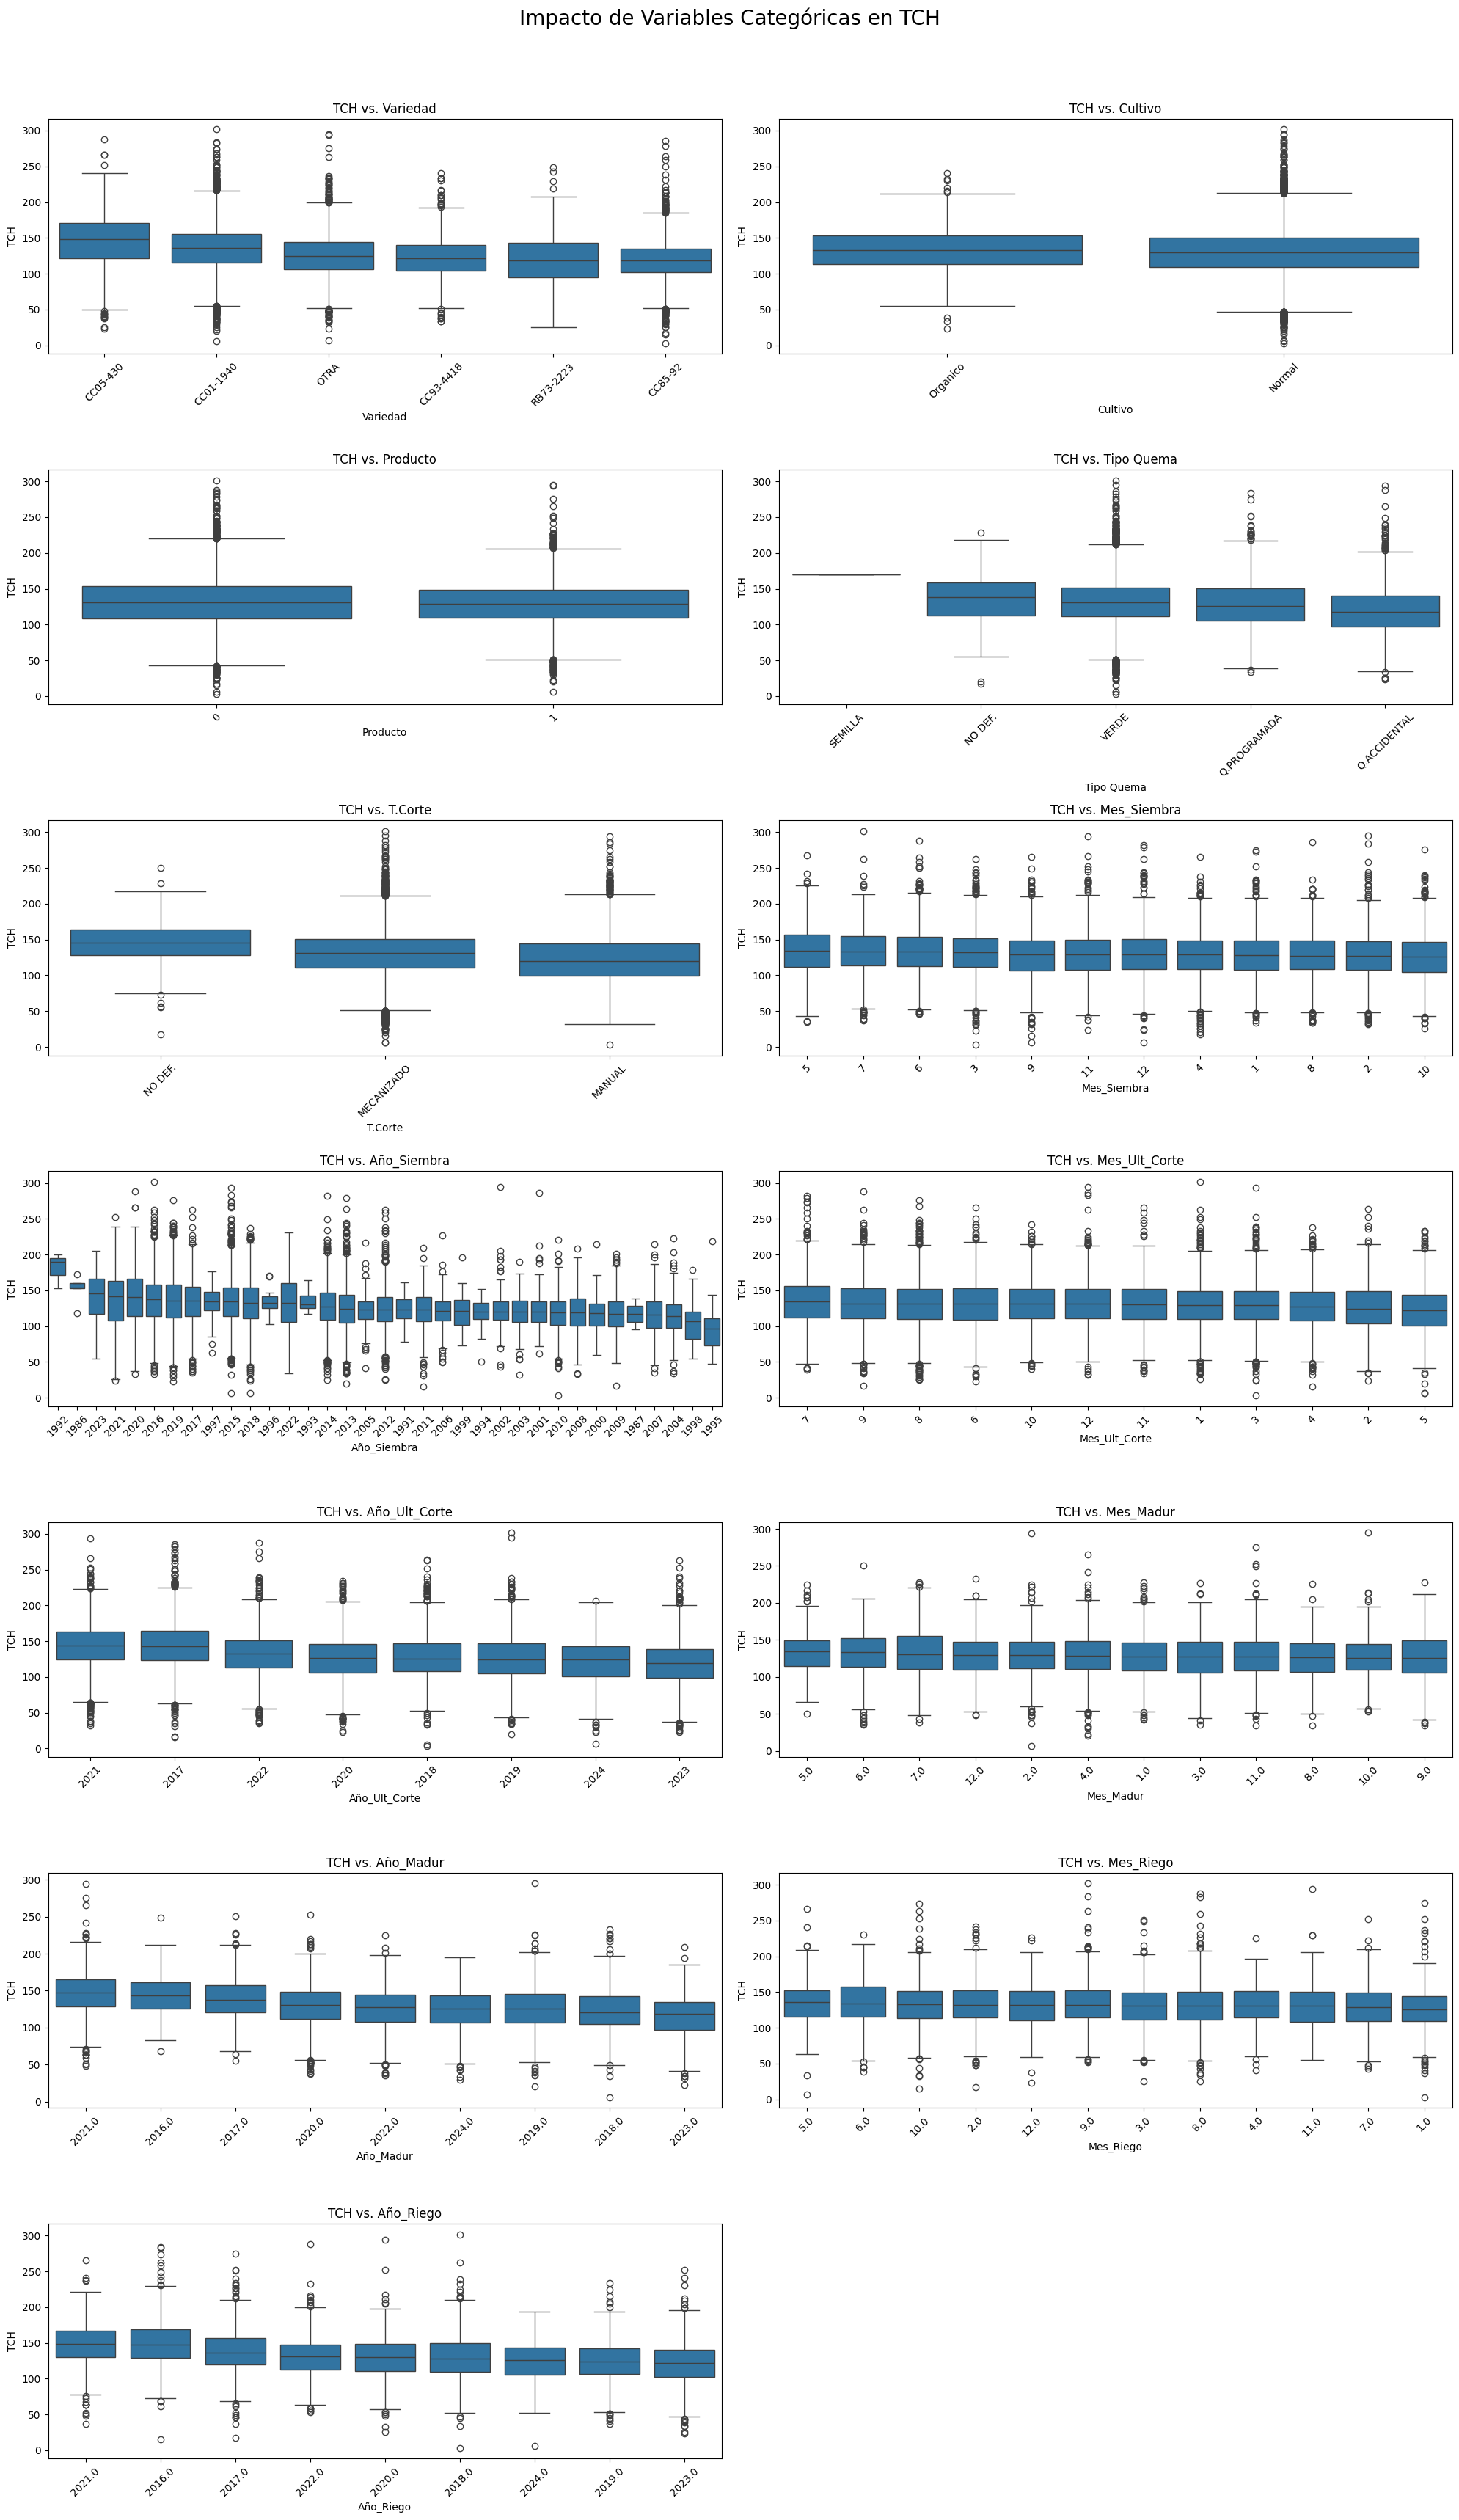

In [122]:
# Número de variables categóricas
n = len(categorical_features)

# Definir número de columnas (ej. 2 o 3 según prefieras)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
fig.suptitle('Impacto de Variables Categóricas en TCH', fontsize=20)

# Asegurar que axes sea 2D
axes = axes.flatten()

# Para TCH
for i, feature in enumerate(categorical_features):
    order = df.groupby(feature)['TCH'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=feature, y='TCH', ax=axes[i], order=order)
    axes[i].set_title(f'TCH vs. {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Ocultar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [123]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [129]:
numeric_features = []

for col in correlaciones_uso:
    numeric_features.append(col[1])

numeric_features = list(set(numeric_features))
print(numeric_features)
print(len(numeric_features))


['%AR Jugo', 'Sul.Amonio', 'TAHM', 'TAH', 'Edad Ult Cos', 'Urea 46%', 'MEZ', 'Brix', 'Luvias 9 -FC', 'Radicion Solar 0-3', 'M3 Riego', '%Fibra Caña', 'NITO_XTEND', 'Evaporacion 0-3', '%Sac.Caña', 'Temp. Media 0-3', 'Oscilacion Temp Ciclo', '%ATR', 'Precipitacion Ciclo', 'Ton.Azucar', 'Humedad Rel Media Ciclo', 'Boro Granul.', 'Lluvias 0 -3', 'Lluvias (2 Meses Ant.)', 'DDUlt.Riego', 'TCHM', 'Período', 'Dosis Madurante', 'KATRHM', '%Sac.Muestreadora', 'Sac.Caña Precosecha', '%ME Tot', 'TCH', 'Hacienda', 'Humedad Rel Media 0-3 ', 'Radiacion Solar Ciclo', 'Lluvias seis a nueve', 'Temp. Media Ciclo', 'MicroZinc', 'Edad.Precosecha', 'Tenencia', 'Rdto', 'TonUltCorte', 'Lluvias tres a seis', 'Precipitacion 0_3', 'Temp Max Ciclo', 'Oscilacion Temp Med 0-3', 'Semanas mad.', 'Temp Min Ciclo', 'Area Neta', '%ME Veg', 'Lluvias Ciclo', '%ME Min']
53


In [130]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creamos el preprocesador que aplica la transformación correcta a cada columna
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [131]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [137]:
df[numeric_features]

%AR Jugo  Sul.Amonio      TAHM        TAH  Edad Ult Cos  Urea 46%  MEZ  \
0        0.8400         NaN  1.119567  14.341666         12.81       NaN  NaN   
1        0.5500         NaN  0.911781  10.157241         11.14       NaN  NaN   
2        0.6100         NaN  1.430974  17.629611         12.32       NaN  NaN   
3        0.6700         NaN  1.314947  12.873333          9.79       NaN  NaN   
4        0.9500         NaN  0.813790   9.383002         11.53       NaN  NaN   
...         ...         ...       ...        ...           ...       ...  ...   
20970    0.7136         NaN  0.687649   8.519974         12.39       NaN  NaN   
20971    0.7364         NaN  1.119413  13.970285         12.48       NaN  NaN   
20972    0.7800         NaN  0.751478   9.896969         13.17       NaN  NaN   
20973    1.1125         NaN  1.267915  14.910685         11.76       NaN  NaN   
20974    1.0527         NaN  0.864761  10.394431         12.02       NaN  NaN   

          Brix  Luvias 9 -FC  Radicion Solar 0-3  ...  Lluvias tres a seis  \
0      15.7464         482.0                 NaN  ...                454.0   
1      15.2240           0.0                 NaN  ...                  0.0   
2      14.1130         457.0                 NaN  ...                326.0   
3      13.6350           0.0                 NaN  ...                  0.0   
4      12.9760         284.0                 NaN  ...                255.0   
...        ...           ...                 ...  ...                  ...   
20970  12.5231         206.0             461.136  ...                191.0   
20971  13.2466         415.0                 NaN  ...                271.0   
20972  13.2290         230.0             440.282  ...                176.0   
20973  11.6469         181.0                 NaN  ...                226.0   
20974  12.9388         317.0                 NaN  ...                260.0   

       Precipitacion 0_3  Temp Max Ciclo  Oscilacion Temp Med 0-3  \
0                    NaN             NaN                      NaN   
1                    NaN             NaN                      NaN   
2                    NaN             NaN                      NaN   
3                    NaN             NaN                      NaN   
4                    NaN             NaN                      NaN   
...                  ...             ...                      ...   
20970              182.4            35.4                     17.8   
20971                NaN             NaN                      NaN   
20972              202.7            35.4                     17.8   
20973                NaN             NaN                      NaN   
20974                NaN             NaN                      NaN   

       Semanas mad.  Temp Min Ciclo  Area Neta  %ME Veg  Lluvias Ciclo  \
0          8.428571             NaN       6.00  10.1980         1038.0   
1               NaN             NaN       1.45   7.2730            0.0   
2          8.428571             NaN       8.24   9.3230         1002.0   
3               NaN             NaN       1.05   6.7880            0.0   
4               NaN             NaN       4.53   2.9390          991.0   
...             ...             ...        ...      ...            ...   
20970      8.857142            16.4       7.96   9.6975          613.0   
20971     12.285714             NaN      42.74   9.9051          828.0   
20972      8.857142            16.3       1.32   8.9800          625.0   
20973      4.428571             NaN       6.27  10.2364          546.0   
20974      5.142857             NaN      12.57  11.8921          777.0   

       %ME Min  
0       0.3550  
1       2.2980  
2       3.0000  
3       0.1400  
4       0.5920  
...        ...  
20970   0.2027  
20971   0.1511  
20972   0.1060  
20973   0.1414  
20974   1.9826  

[20578 rows x 53 columns]

In [135]:
valores_nulos = df[numeric_features].isnull().sum()

valores_nulos = valores_nulos[valores_nulos > 0]
print(valores_nulos)

%AR Jugo                    1675
Sul.Amonio                 19270
Urea 46%                   19871
MEZ                        19654
Radicion Solar 0-3         16205
%Fibra Caña                 1591
NITO_XTEND                 17070
Evaporacion 0-3            16205
Temp. Media 0-3            16205
Oscilacion Temp Ciclo      16205
%ATR                          73
Precipitacion Ciclo        16205
Humedad Rel Media Ciclo    16205
Boro Granul.               19355
Dosis Madurante               96
KATRHM                        73
%Sac.Muestreadora           1591
Sac.Caña Precosecha         1093
%ME Tot                     1271
Humedad Rel Media 0-3      16205
Radiacion Solar Ciclo      16205
Temp. Media Ciclo          16205
MicroZinc                  19468
Edad.Precosecha            11670
Tenencia                       1
Precipitacion 0_3          16205
Temp Max Ciclo             16205
Oscilacion Temp Med 0-3    16205
Semanas mad.                9416
Temp Min Ciclo             16205
%ME Veg   

In [132]:
# Definimos el modelo completo
# 1. Primero se ejecuta el 'preprocessor' (que contiene el OneHotEncoder)
# 2. Luego, los datos transformados pasan al modelo Lasso
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])

# Separamos los datos
X = df[numeric_features + categorical_features]
y = df['TCH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Al llamar a .fit(), Scikit-learn ejecuta todo automáticamente:
# 1. El ColumnTransformer identifica las columnas en 'categorical_features'.
# 2. El OneHotEncoder se aplica a esas columnas.
# 3. El resto de las transformaciones se aplican en paralelo.
# 4. El modelo Lasso se entrena con el conjunto de datos ya transformado y codificado.

model_pipeline.fit(X_train, y_train) 

print("El One-Hot Encoding se configura en la variable 'categorical_transformer' y se ejecuta automáticamente dentro del 'model_pipeline' al llamar a .fit().")


ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Variedad
cultivo
tipo de quema 
t corte